In [7]:
# Put all the imports here
import folium
import numpy as np
import pandas as pd
import plotly as ply
import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import seaborn as sns

from geopy.geocoders import Nominatim
from matplotlib import pyplot as plt

# Make plotly work in offline mode
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [3]:
h1b_frame = pd.read_csv('./data/h1b.csv') # dataset to large, please download from README.md

In [11]:
h1b_frame_with_states = pd.read_csv("./data/h1b_with_states.csv")

In [9]:
cap_exampt_employee_list = pd.read_csv("./data/cap-exampt-employee-list.csv", encoding="ISO-8859-1")
cap_exampt_employee_list = list(cap_exampt_employee_list['employeer'])
cap_exampt_employee_list.append('university')
cap_exampt_employee_list.append('college')

In [117]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
cap_exempt_counts = []

for y in years: 
    h1b_frame_group = h1b_frame_with_states.loc[ h1b_frame_with_states['CASE_STATUS'] == 'CERTIFIED']
    h1b_frame_group = h1b_frame_group.loc[ h1b_frame_group['state'] != 'Na']
    h1b_frame_group = h1b_frame_group.loc[ h1b_frame_group['YEAR'] == y ]
    h1b_frame_group_exempt = h1b_frame_group.loc[ h1b_frame_group['EMPLOYER_NAME'].str.contains('|'.join(cap_exampt_employee_list), case=False, na=False, regex=True) ]
    cap_exempt = h1b_frame_group_exempt.count()['Unnamed: 0']
    cap_exempt_counts.append(cap_exempt)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [122]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
total_counts = []

for y in years: 
    h1b_frame_group = h1b_frame_with_states.loc[ h1b_frame_with_states['CASE_STATUS'] == 'CERTIFIED']
    h1b_frame_group = h1b_frame_group.loc[ h1b_frame_group['state'] != 'Na']
    h1b_frame_group = h1b_frame_group.loc[ h1b_frame_group['YEAR'] == y ]
    total_count = h1b_frame_group.count()['Unnamed: 0']
    total_counts.append(total_count)

In [5]:
# copying result so it is easier to use later
years = [2011, 2012, 2013, 2014, 2015, 2016]
cap_exempt_counts = [25475, 24167, 23244, 23873, 24683, 24589]
total_counts = [307581, 352169, 382590, 454738, 546705, 569180]
non_cap_exempt = [282106, 328002, 359346, 430865, 522022, 544591]

In [8]:
labels = ['Cap Exempt', 'Cap Non-exempt']

for i in range(0, len(cap_exempt_counts)):
    layout = {
        "title" : ("Cap Exempt vs Cap Non-Exempt in %s" % years[i]),
    }
    
    data = {
        "values":[cap_exempt_counts[i], non_cap_exempt[i]],
        "labels":labels,
        "name": years[i],
        "type": "pie",
    }

    fig = go.Figure(
        data=[data], 
        layout=layout
    )
    
    iplot(fig, filename='donut')

In [ ]:
# Potentially want to apply for H1B? What are the companies with top salaries, most H1B applications, etc in Bay Area

In [17]:
h1b_frame_cali = h1b_frame_with_states.loc[ h1b_frame_with_states['CASE_STATUS'] == 'CERTIFIED']
h1b_frame_cali = h1b_frame_cali.loc[ h1b_frame_cali['state'] == 'California']
h1b_frame_cali = h1b_frame_cali.loc[ h1b_frame_cali['YEAR'] == 2016]

categories = ['computer']
h1b_frame_cali = h1b_frame_cali.loc[ h1b_frame_cali['SOC_NAME'].str.
                                    contains('|'.join(categories), case=False, na=False, regex=True) ]

lat = [36.5, 41.5] # San francisco, Okland, WC etc
lon = [-123.0, -120.0] # from Santa Rosa to Gillroy

h1b_frame_cali = h1b_frame_cali.loc[ 
    (h1b_frame_cali['lat'].between(lat[0], lat[1], inclusive=True)) &
    (h1b_frame_cali['lon'].between(lon[0], lon[1], inclusive=True))
]

In [23]:
h1b_frame_cali_group = h1b_frame_cali.groupby('EMPLOYER_NAME').count().sort_values('Unnamed: 0', ascending=False)
h1b_frame_cali_group[:5]

,Unnamed: 0,Unnamed: 0.1,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,state
EMPLOYER_NAME,,,,,,,,,,,,
INFOSYS LIMITED,2582,2582,2582,2582,2582,2582,2582,2582,2582,2582,2582,2582
WIPRO LIMITED,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251,1251
"HCL AMERICA, INC.",561,561,561,561,561,561,561,561,561,561,561,561
TATA CONSULTANCY SERVICES LIMITED,541,541,541,541,541,541,541,541,541,541,541,541
"TECH MAHINDRA (AMERICAS),INC.",538,538,538,538,538,538,538,538,538,538,538,538


In [26]:
more_1000 = h1b_frame_cali_group.loc[h1b_frame_cali_group['Unnamed: 0'] > 1000].index.values
between_100_and_1000 = h1b_frame_cali_group.loc[h1b_frame_cali_group['Unnamed: 0'].between(100, 999, inclusive=True)].index.values

In [27]:
more_1000

array(['INFOSYS LIMITED', 'WIPRO LIMITED'], dtype=object)

In [28]:
between_100_and_1000

array(['HCL AMERICA, INC.', 'TATA CONSULTANCY SERVICES LIMITED',
       'TECH MAHINDRA (AMERICAS),INC.', 'ACCENTURE LLP',
       'IBM INDIA PRIVATE LIMITED', 'INTEL CORPORATION', 'APPLE INC.',
       'GOOGLE INC.', 'EXILANT TECHNOLOGIES PRIVATE LIMITED',
       'PERSISTENT SYSTEMS, INC.', 'SRS CONSULTING INC.', 'FACEBOOK, INC.',
       'DELOITTE CONSULTING LLP', 'MARVELL SEMICONDUCTOR, INC.',
       'ETOUCH SYSTEMS CORPORATION', 'TRINGAPPS INC',
       'CAPGEMINI AMERICA INC', 'TECH MAHINDRA (AMERICAS), INC.',
       'COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION',
       'CISCO SYSTEMS, INC.', 'IBM CORPORATION',
       'TAVANT TECHNOLOGIES, INC.', 'VENTURESOFT GLOBAL INC',
       'CRITICALRIVER, INC.', 'SNW INFOTECH INC', 'YAHOO! INC.',
       'GSPANN TECHNOLOGIES, INC.', 'DGN TECHNOLOGIES INC',
       'ALPHA NET CONSULTING LLC'], dtype=object)

In [29]:
between_99_and_50 = h1b_frame_cali_group.loc[h1b_frame_cali_group['Unnamed: 0'].between(50, 99, inclusive=True)].index.values

In [30]:
between_99_and_50

array(['ERNST & YOUNG U.S. LLP', 'TEXARA SOLUTIONS LLC',
       'NVIDIA CORPORATION', 'LINKEDIN CORPORATION',
       'ESTRADA CONSULTING INC', 'ALTERA CORPORATION',
       'TECH MAHINDRA (AMERICAS) INC.', 'ARICENT N.A. INC.',
       'NTT DATA, INC.', 'GLOBALLOGIC,INC.', 'ORACLE AMERICA, INC.',
       'AUTODESK, INC.', 'ARICENT N.A.',
       'LARSEN & TOUBRO INFOTECH LIMITED', 'NISUM TECHNOLOGIES INC.',
       'ITECH ANALYST CORP', 'EVEREST CONSULTING GROUP, INC.,',
       'IPOLARITY LLC', 'VINGS TECHNOLOGIES LIMITED', 'SMARTPLAY, INC.',
       'XORIANT CORPORATION', 'CADENCE DESIGN SYSTEMS, INC.',
       'ZENSAR TECHNOLOGIES INC.',
       'PRICEWATERHOUSECOOPERS ADVISORY SERVICES LLC', 'BRILLIO, LLC',
       'SALESFORCE.COM INC.', 'HEWLETT PACKARD ENTERPRISE COMPANY',
       'SYMANTEC CORPORATION', 'VMWARE, INC.', 'EMC CORPORATION',
       'INTUIT INC.', 'QUALCOMM TECHNOLOGIES, INC.', 'SANDISK CORPORATION',
       'SPARTA CONSULTING INC.', 'MPHASIS CORPORATION',
       'COMPUNNEL SOFTW

In [31]:
between_20_and_49 = h1b_frame_cali_group.loc[h1b_frame_cali_group['Unnamed: 0'].between(20, 49, inclusive=True)].index.values

In [32]:
between_5_and_19 = h1b_frame_cali_group.loc[h1b_frame_cali_group['Unnamed: 0'].between(5, 19, inclusive=True)].index.values

In [216]:
# all_counts = h1b_frame_cali.loc[h1b_frame_cali['EMPLOYER_NAME'] == 'WIPRO LIMITED']
# jobs = ['software']
#all_counts[all_counts['JOB_TITLE'].str.contains('|'.join(jobs), case=False, na=False)].groupby('JOB_TITLE', as_index=False)['PREVAILING_WAGE']
#     all_counts = all_counts[all_counts['SOC_NAME'].str.contains('|'.join(jobs), case=False, na=False)]


Median Salary: $89149.0


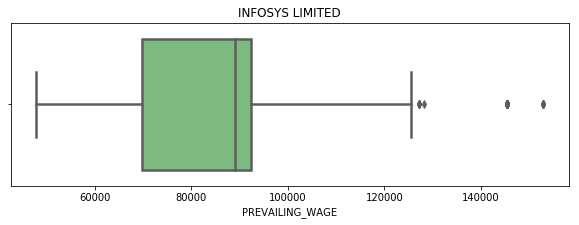

Median Salary: $90355.0


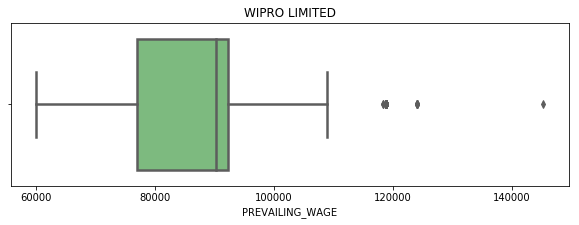

In [34]:
mean_salaries = []

for company in list(more_1000):
    all_counts = h1b_frame_cali.loc[h1b_frame_cali['EMPLOYER_NAME'] == company]
    median = all_counts['PREVAILING_WAGE'].median()
    print("Median Salary: $%s" % median)
    fig = plt.figure(figsize = (10, 3))
    ax = sns.boxplot(x='PREVAILING_WAGE', data=all_counts, linewidth=2.5, palette="Greens")
    ax.set_title(company)
    plt.show()  
    mean_salaries.append((company, median))


Median Salary: $65770.0


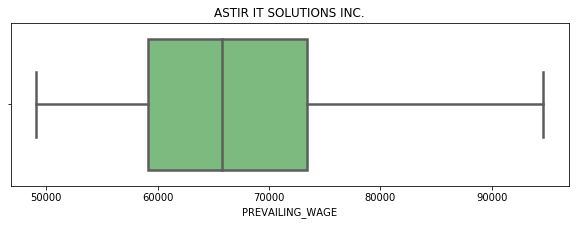

Median Salary: $110365.0


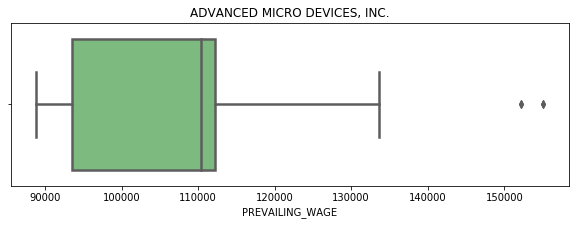

Median Salary: $94141.0


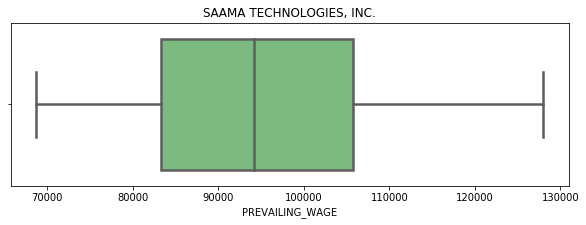

Median Salary: $104312.0


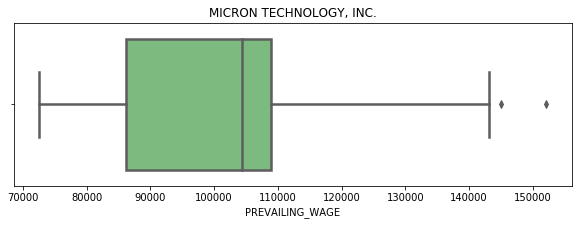

Median Salary: $85415.5


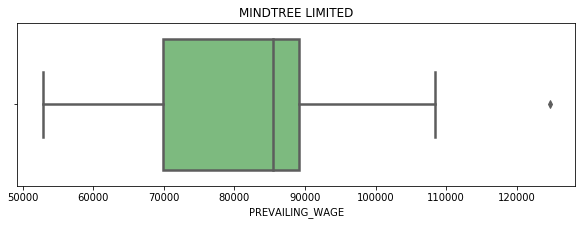

Median Salary: $97573.0


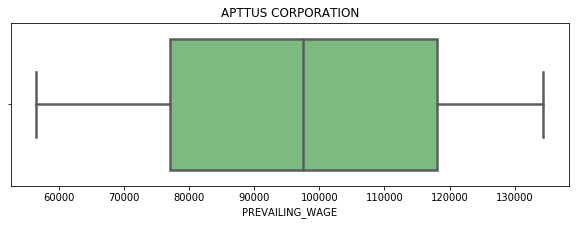

Median Salary: $112455.0


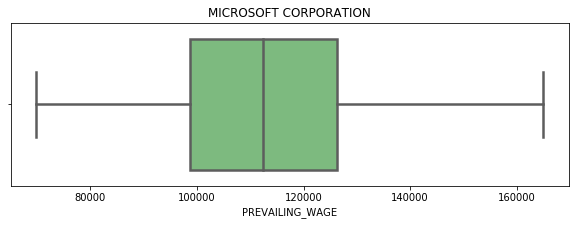

Median Salary: $61942.0


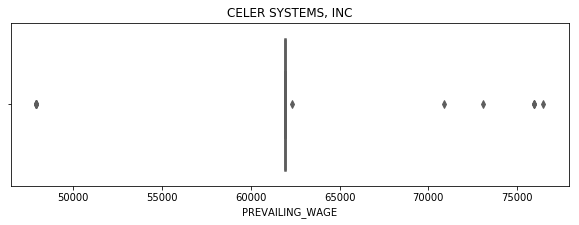

Median Salary: $77064.0


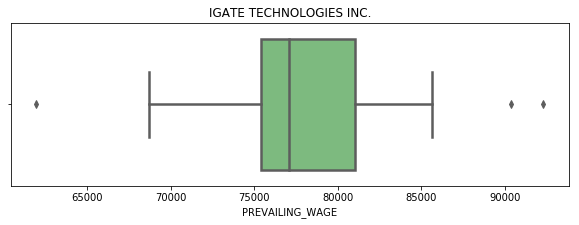

Median Salary: $92877.5


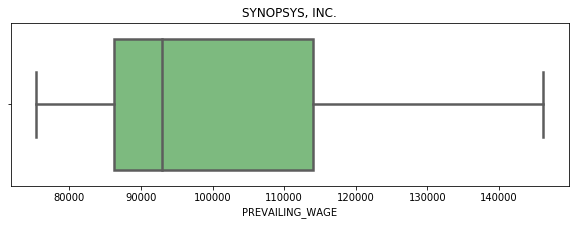

Median Salary: $92290.0


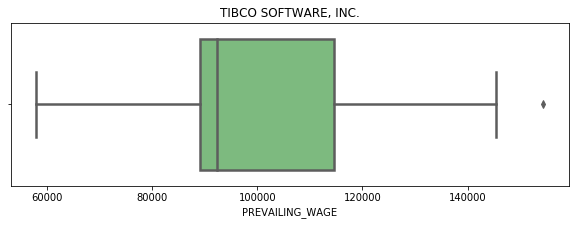

Median Salary: $54059.0


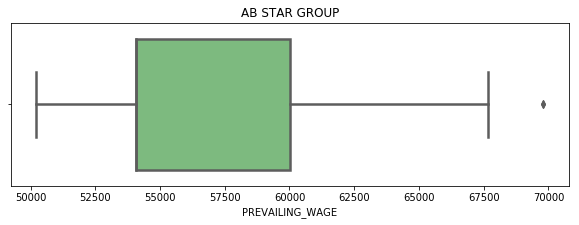

Median Salary: $54059.0


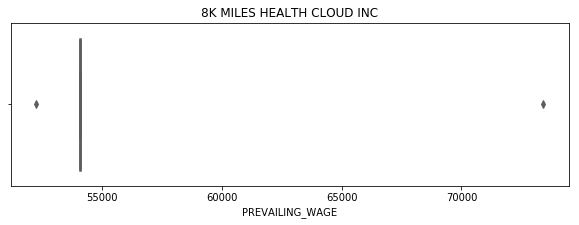

Median Salary: $94037.0


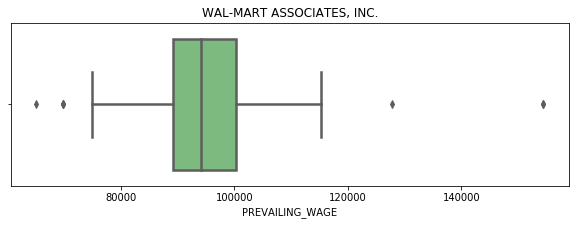

Median Salary: $77064.0


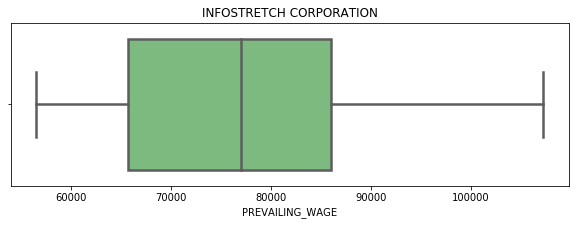

Median Salary: $74443.0


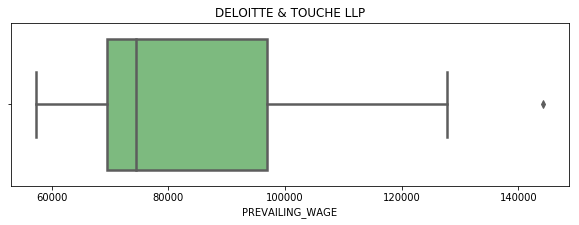

Median Salary: $98779.0


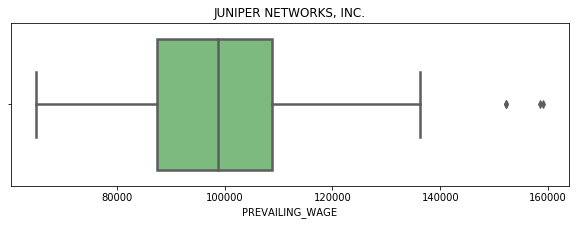

Median Salary: $81338.5


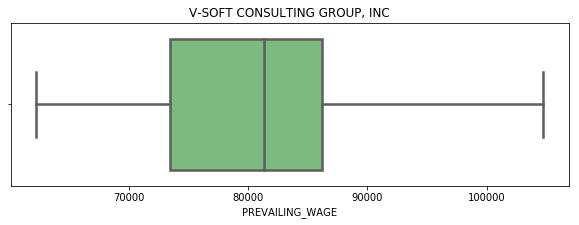

Median Salary: $106184.0


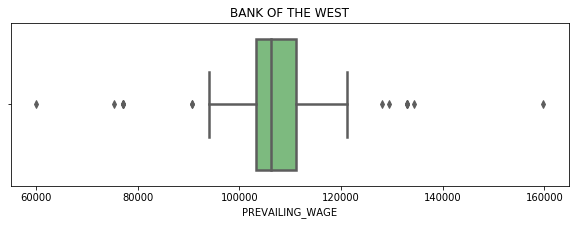

Median Salary: $54059.2


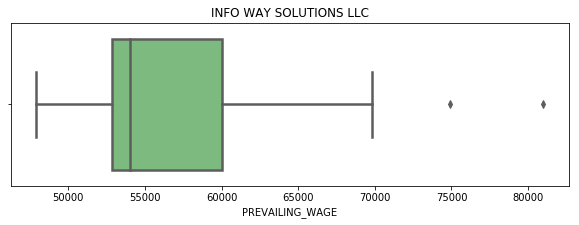

Median Salary: $125824.0


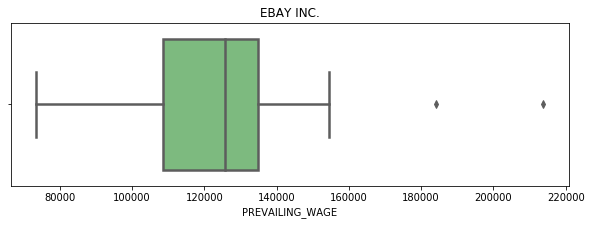

Median Salary: $77064.0


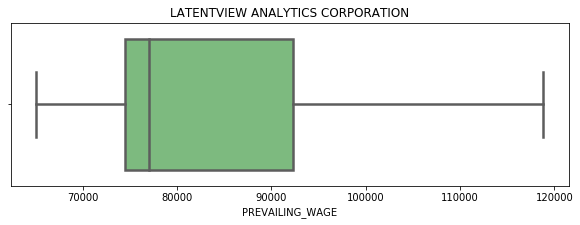

Median Salary: $114279.0


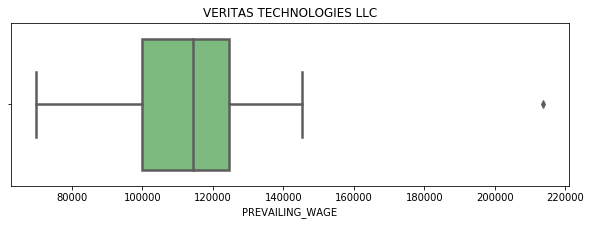

Median Salary: $84208.5


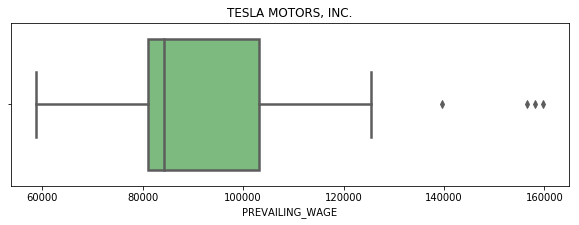

Median Salary: $103476.0


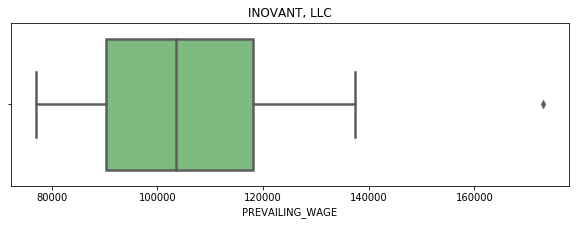

Median Salary: $108992.0


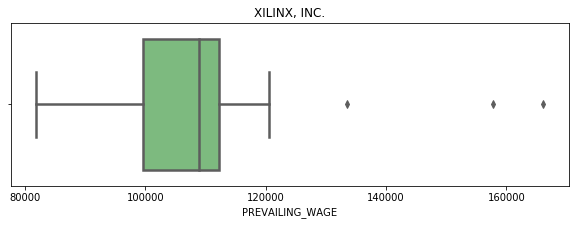

Median Salary: $61942.0


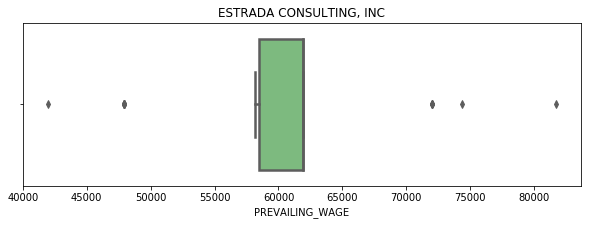

Median Salary: $118082.0


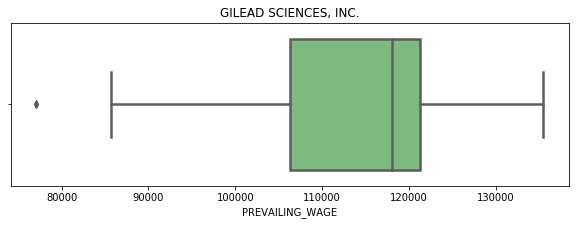

Median Salary: $94619.0


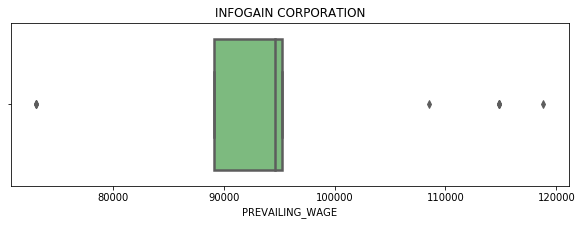

Median Salary: $52832.0


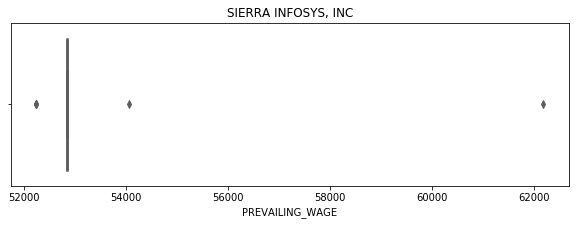

Median Salary: $85634.0


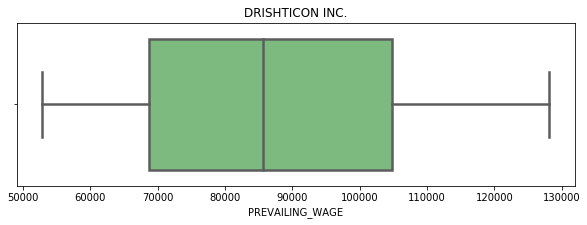

Median Salary: $77064.0


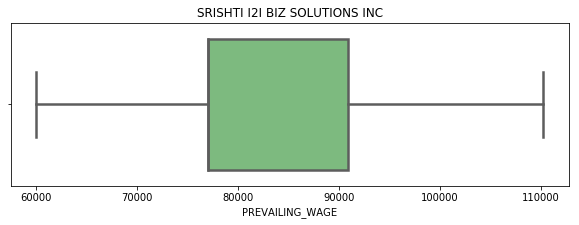

Median Salary: $111991.0


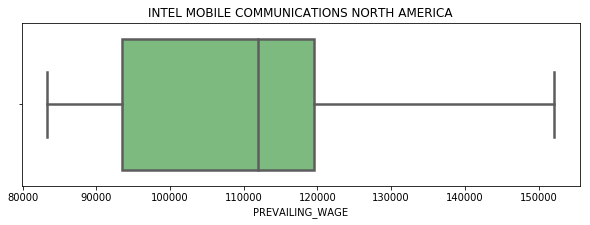

Median Salary: $93405.0


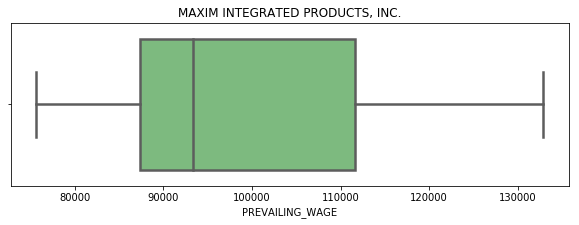

Median Salary: $52832.0


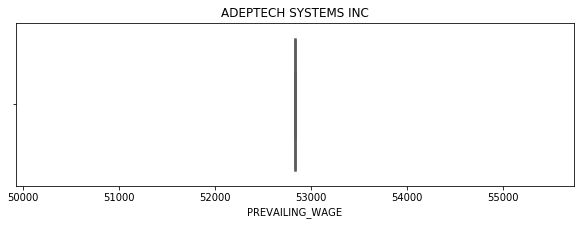

Median Salary: $60029.0


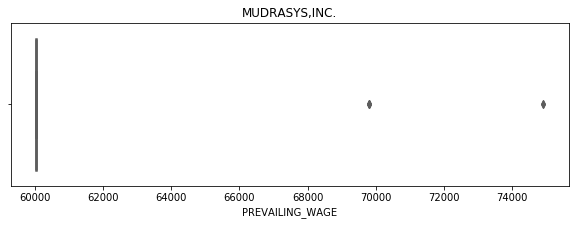

Median Salary: $54059.0


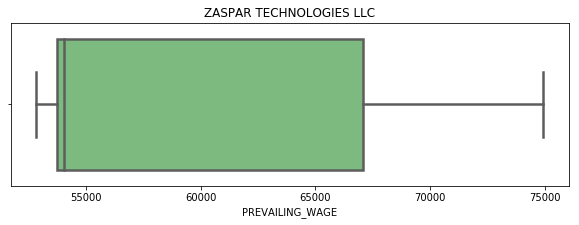

Median Salary: $87422.0


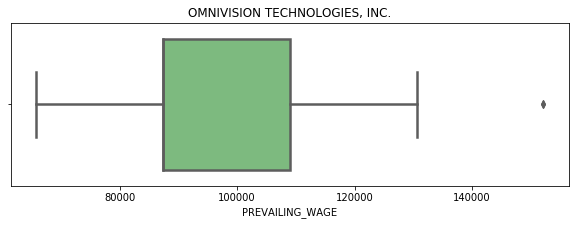

Median Salary: $68682.0


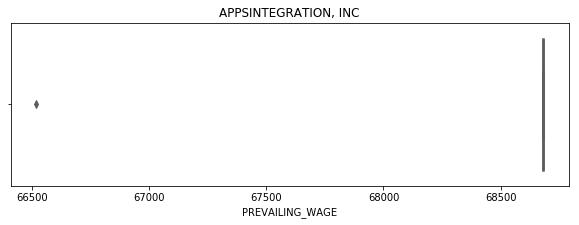

Median Salary: $54059.0


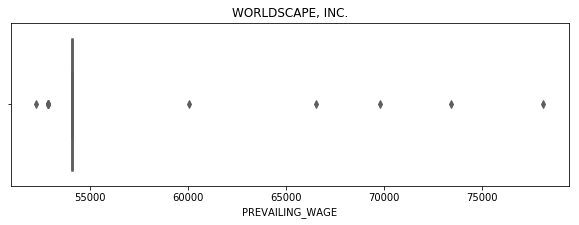

Median Salary: $93350.0


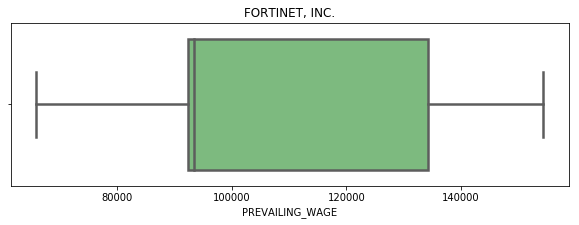

Median Salary: $60029.0


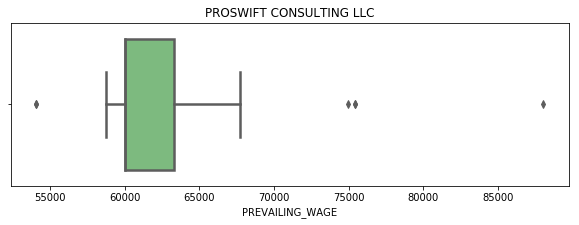

Median Salary: $89149.0


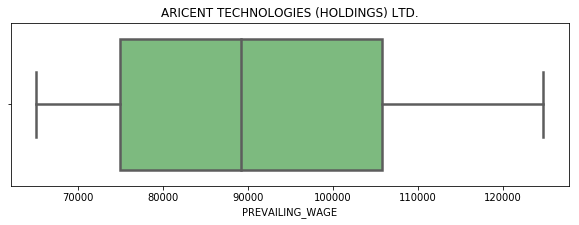

Median Salary: $69243.5


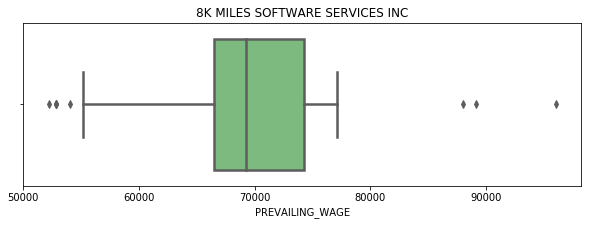

Median Salary: $108493.0


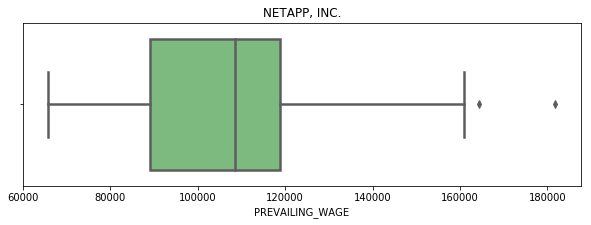

Median Salary: $108992.0


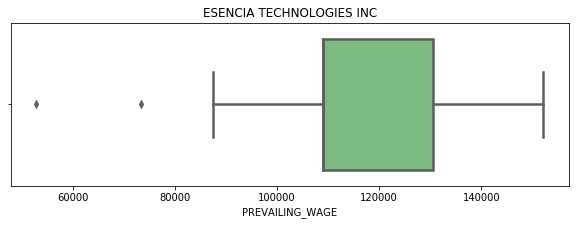

Median Salary: $92290.0


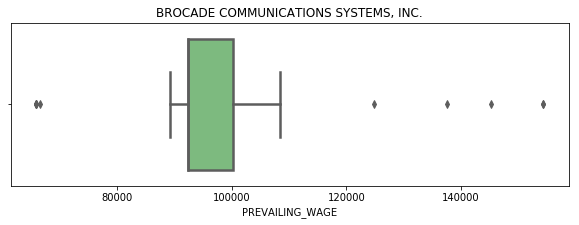

Median Salary: $99600.0


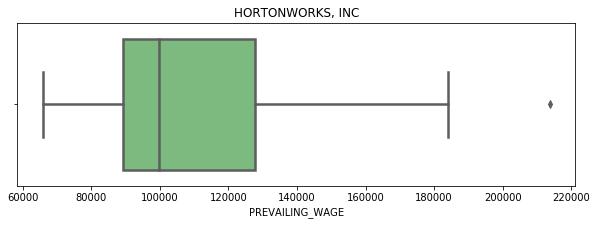

Median Salary: $90355.0


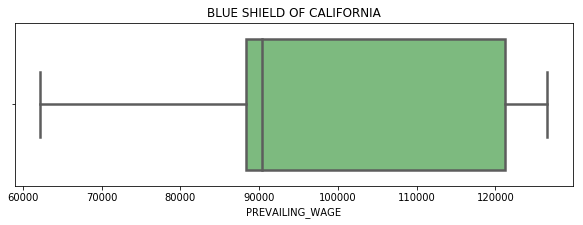

Median Salary: $60029.0


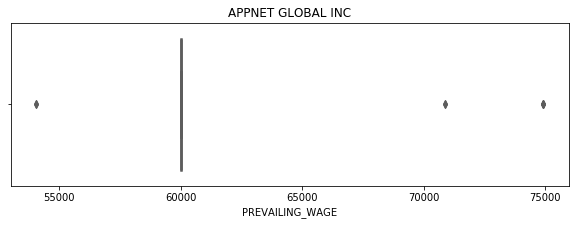

Median Salary: $69804.8


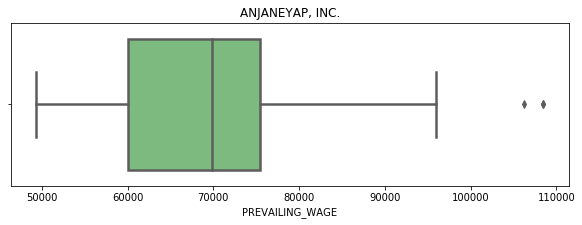

Median Salary: $74921.6


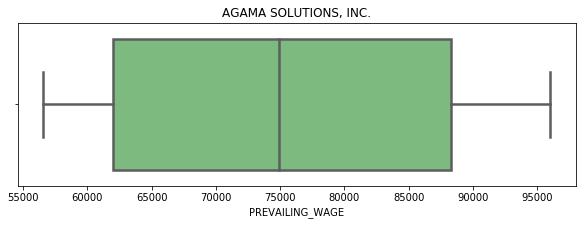

Median Salary: $69805.0


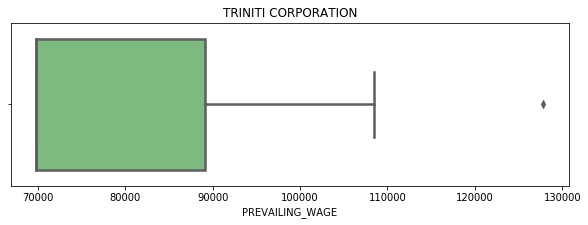

Median Salary: $75421.0


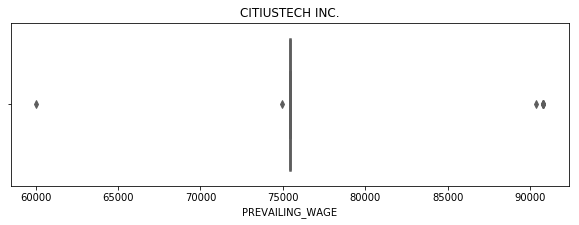

Median Salary: $71448.0


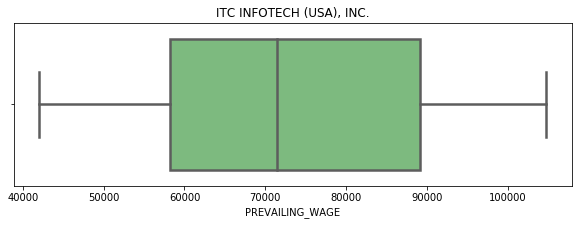

Median Salary: $75420.8


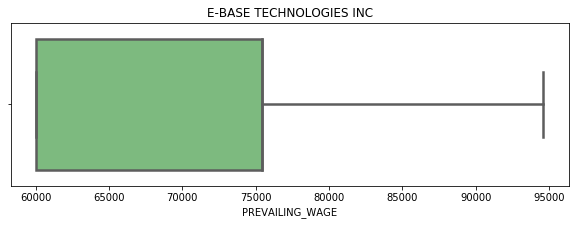

Median Salary: $114579.0


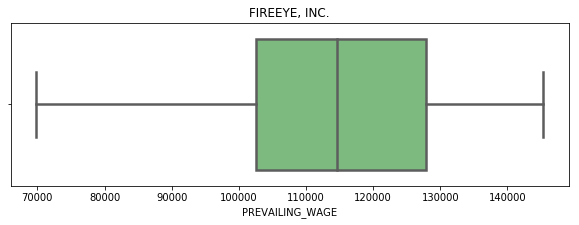

Median Salary: $65770.0


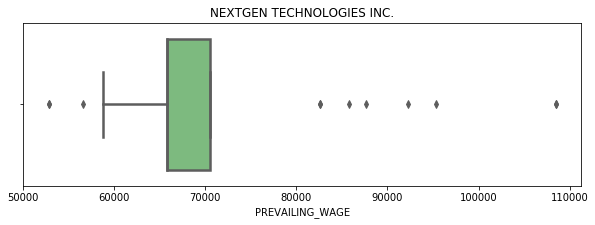

Median Salary: $65042.0


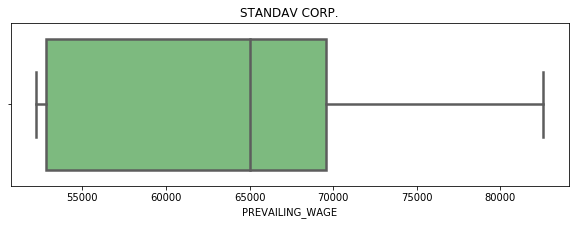

Median Salary: $73424.0


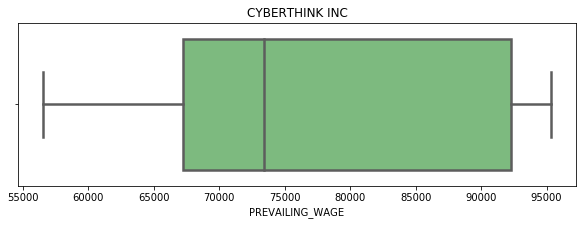

Median Salary: $74443.2


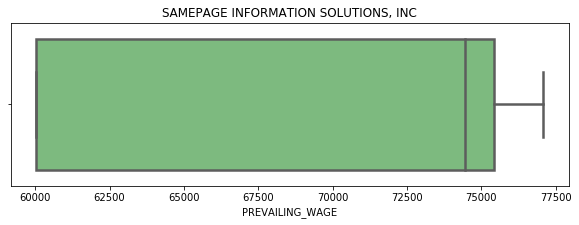

Median Salary: $69805.0


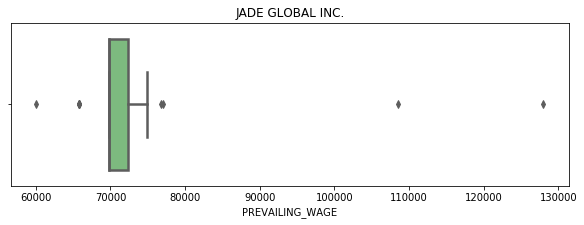

Median Salary: $90355.0


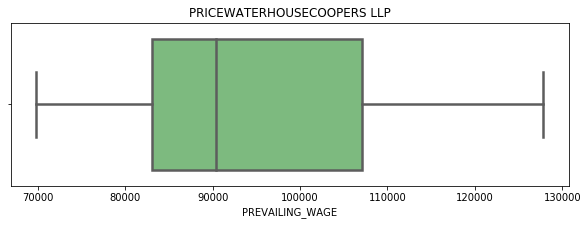

Median Salary: $69805.0


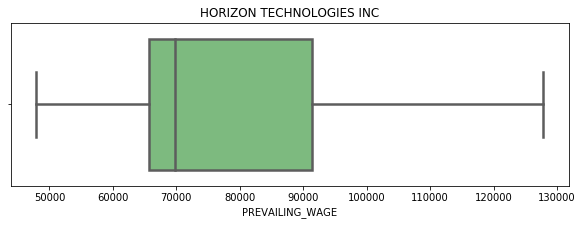

Median Salary: $69805.0


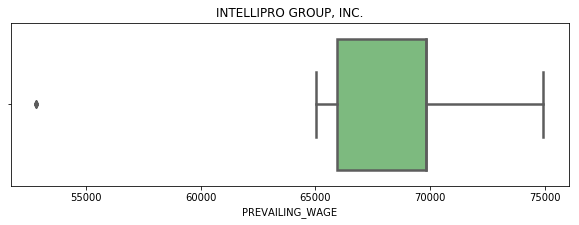

Median Salary: $69805.0


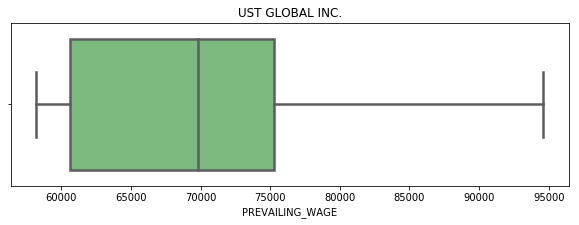

Median Salary: $60029.0


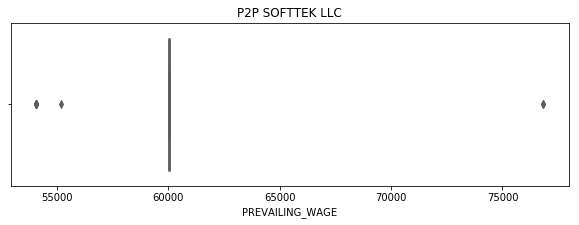

Median Salary: $88026.0


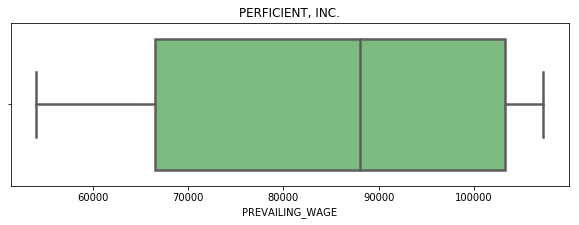

Median Salary: $74921.6


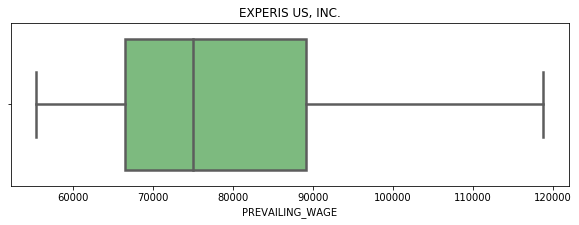

Median Salary: $54059.0


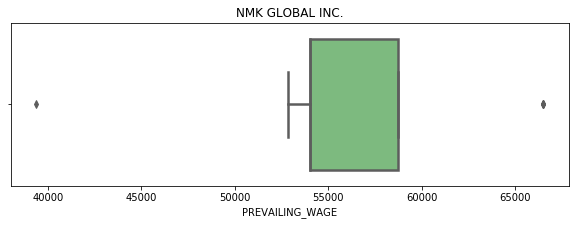

Median Salary: $90355.0


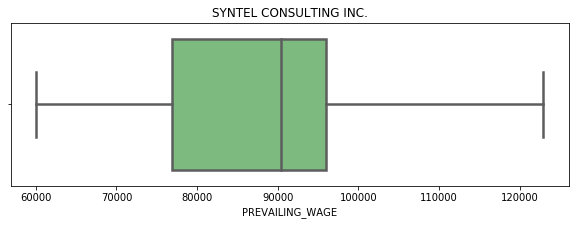

Median Salary: $56409.5


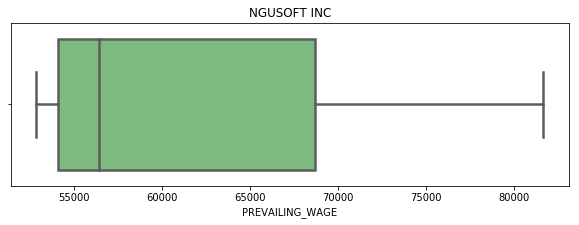

Median Salary: $92290.0


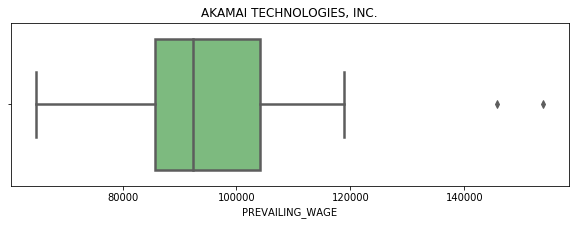

Median Salary: $66518.0


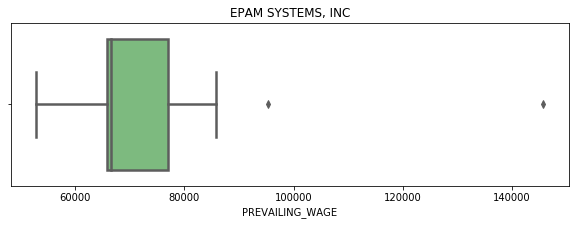

Median Salary: $54059.0


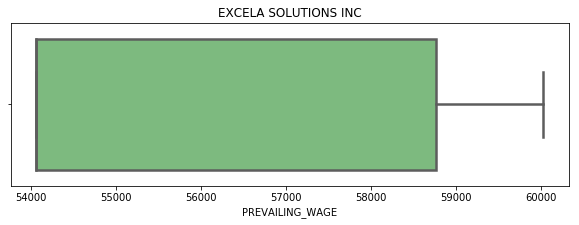

Median Salary: $61942.0


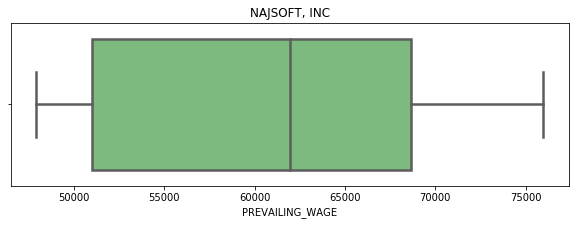

Median Salary: $96013.0


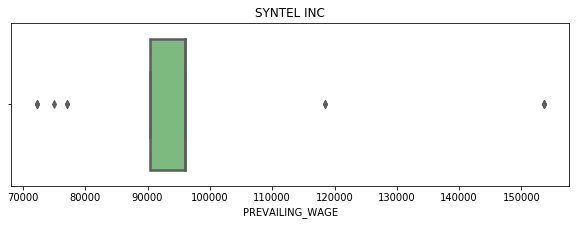

Median Salary: $58760.0


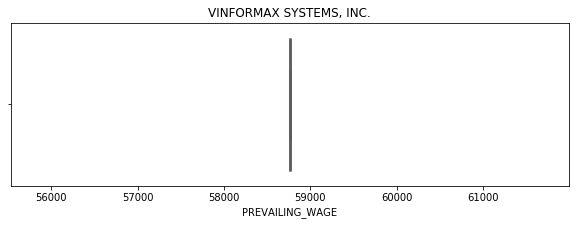

Median Salary: $54059.0


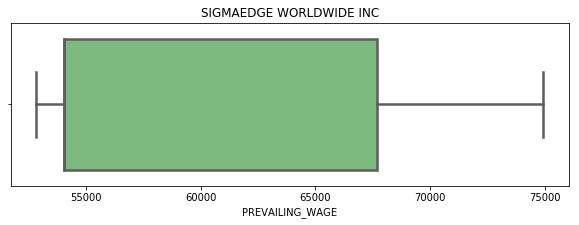

Median Salary: $69805.0


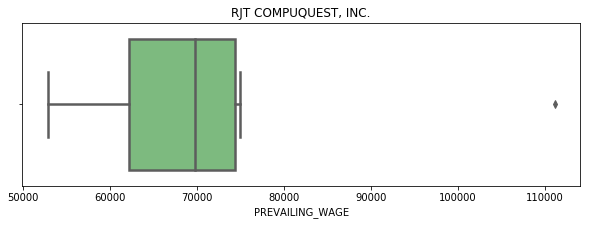

Median Salary: $95306.0


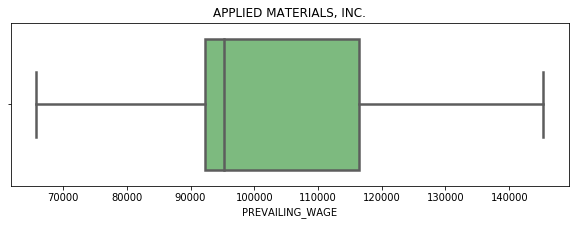

Median Salary: $58760.0


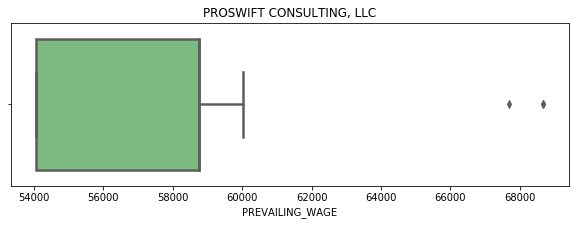

Median Salary: $73424.0


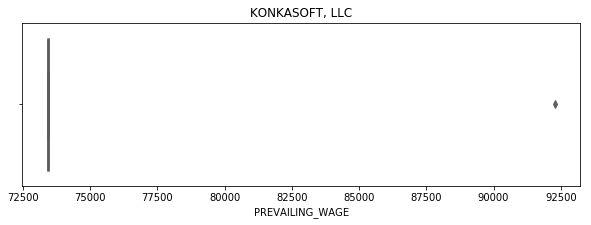

Median Salary: $69805.0


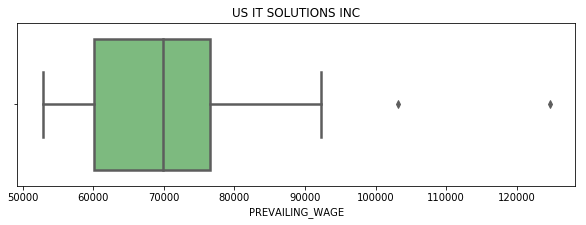

Median Salary: $89149.0


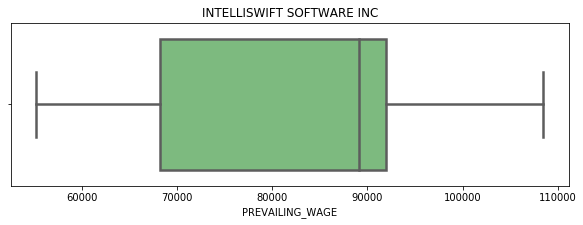

Median Salary: $98290.5


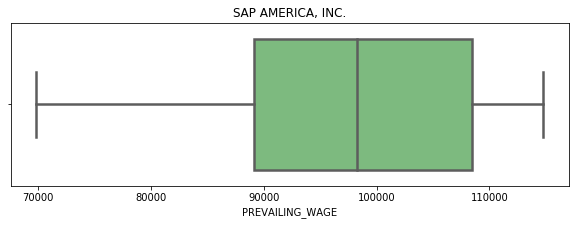

Median Salary: $65770.0


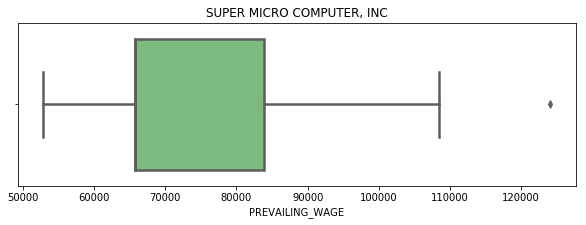

Median Salary: $58292.0


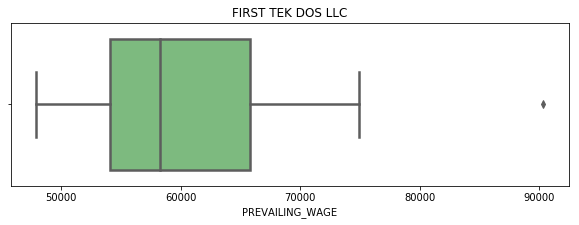

Median Salary: $69805.0


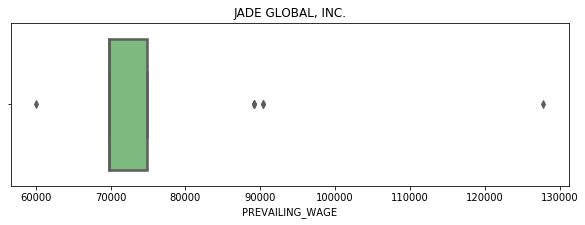

Median Salary: $90355.0


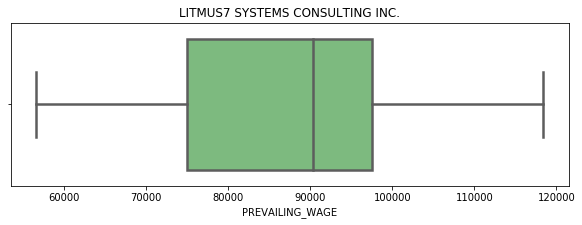

Median Salary: $108992.0


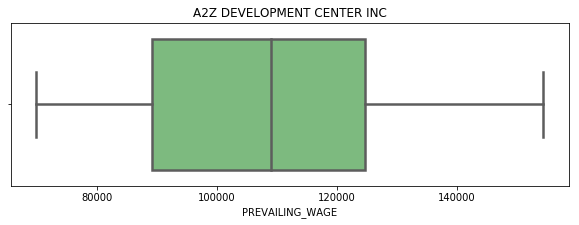

Median Salary: $103862.0


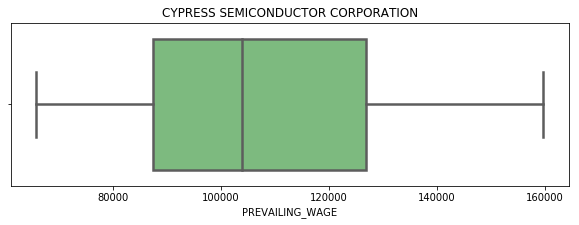

Median Salary: $78240.0


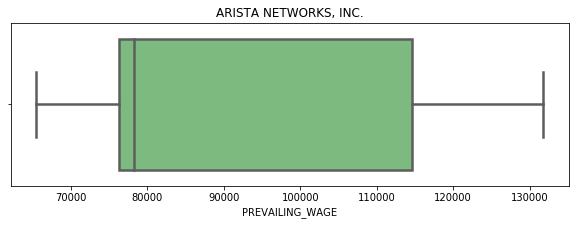

Median Salary: $58760.0


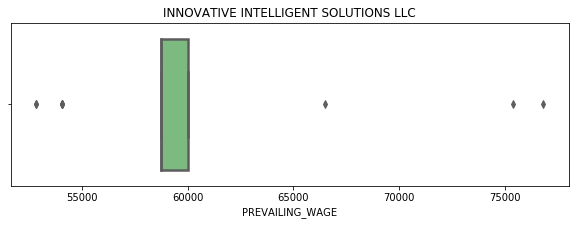

Median Salary: $58760.0


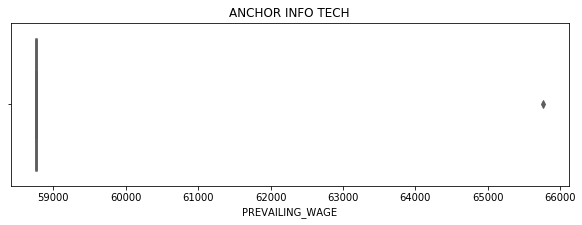

Median Salary: $89024.0


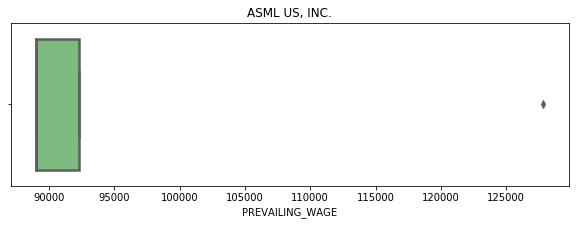

Median Salary: $55162.0


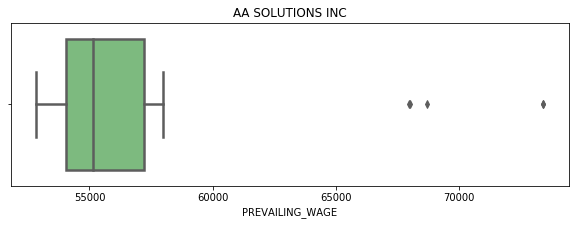

Median Salary: $65770.0


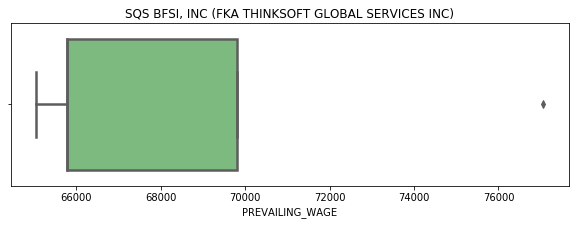

Median Salary: $138486.0


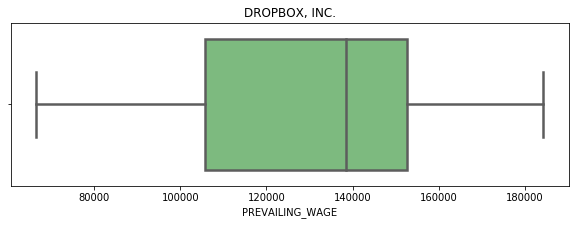

Median Salary: $117572.0


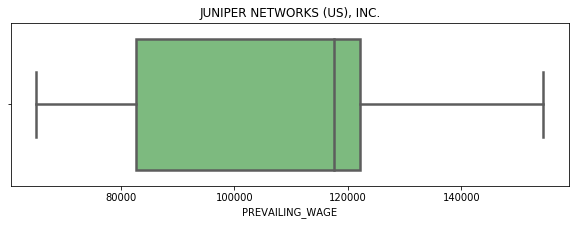

Median Salary: $54059.0


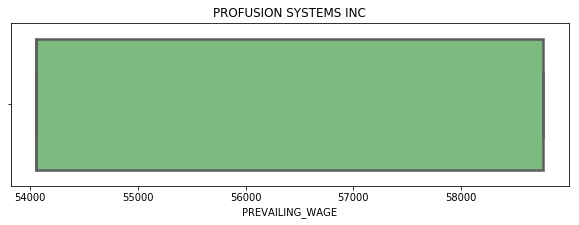

Median Salary: $69805.0


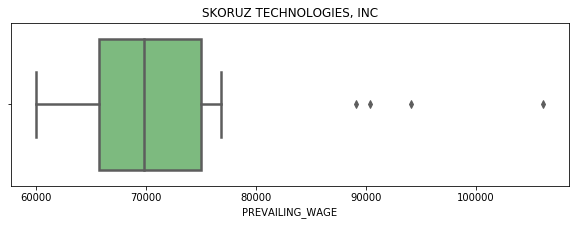

Median Salary: $52832.0


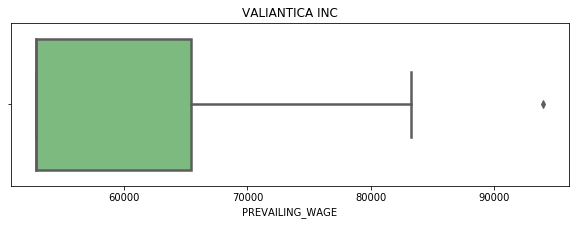

Median Salary: $68682.0


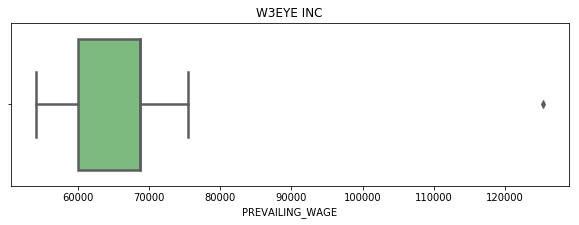

Median Salary: $106121.5


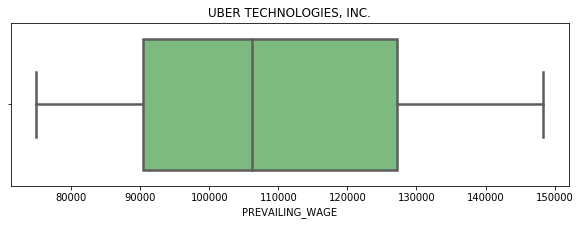

Median Salary: $73424.0


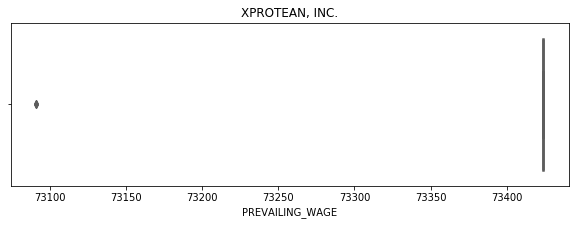

Median Salary: $72124.0


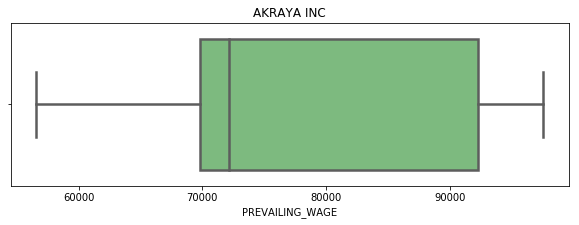

Median Salary: $73424.0


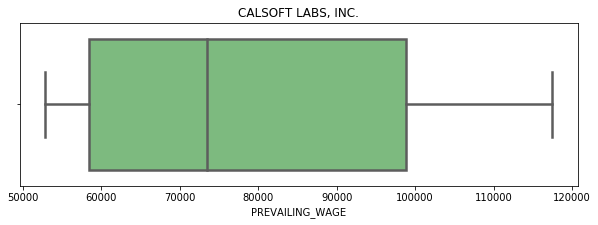

Median Salary: $60029.0


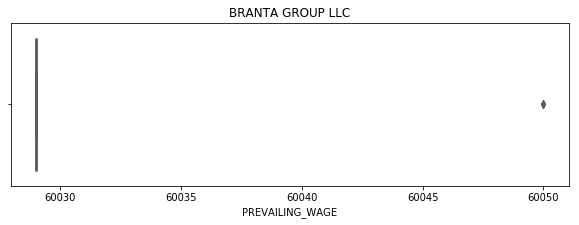

Median Salary: $101608.0


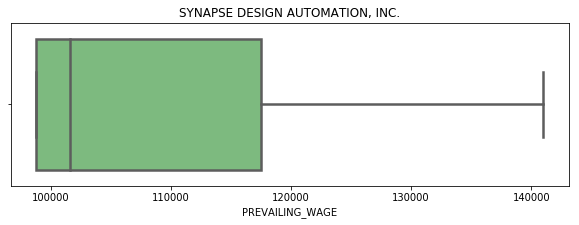

Median Salary: $60029.0


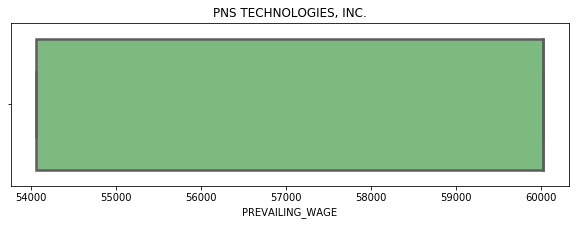

Median Salary: $118414.0


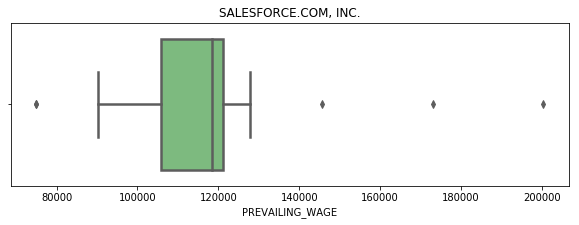

Median Salary: $60029.0


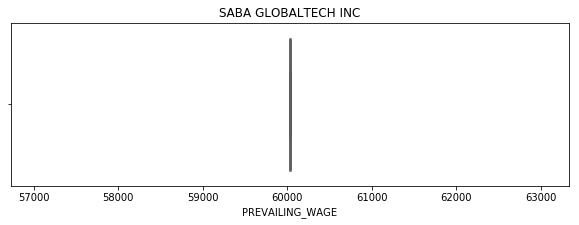

Median Salary: $73985.5


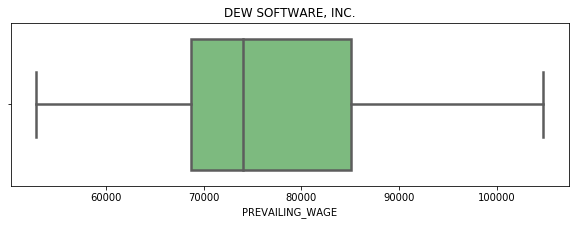

Median Salary: $54059.0


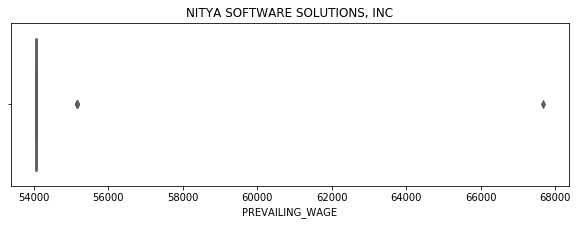

Median Salary: $94619.0


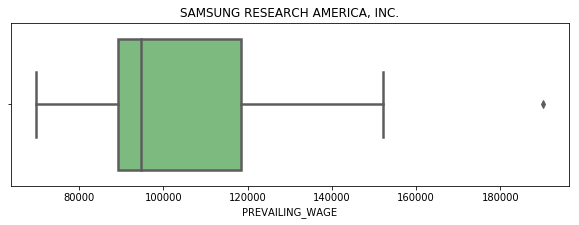

Median Salary: $63492.0


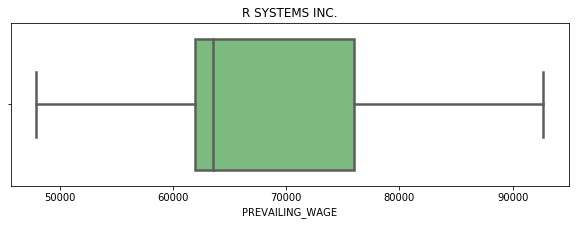

Median Salary: $89149.0


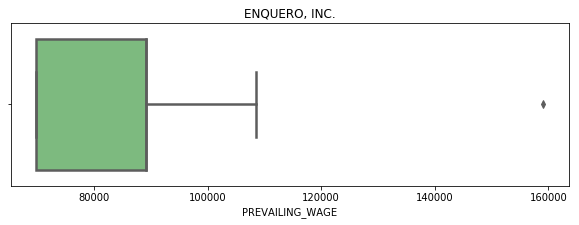

Median Salary: $68161.5


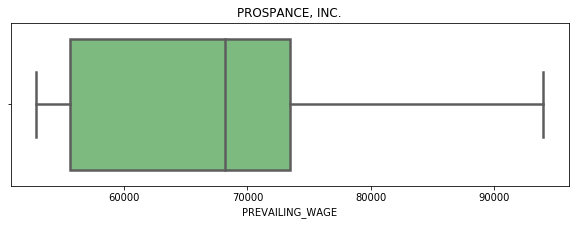

Median Salary: $61942.4


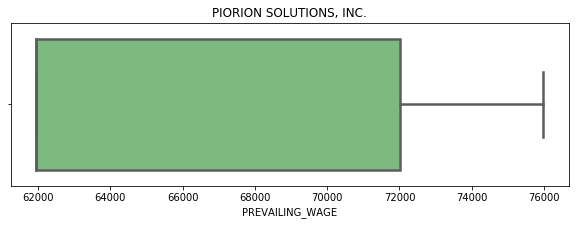

Median Salary: $113505.5


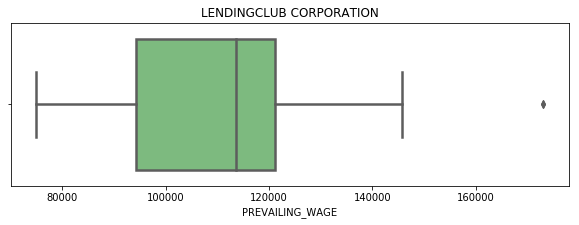

Median Salary: $69805.0


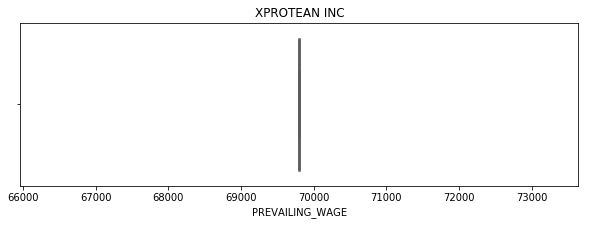

Median Salary: $60029.0


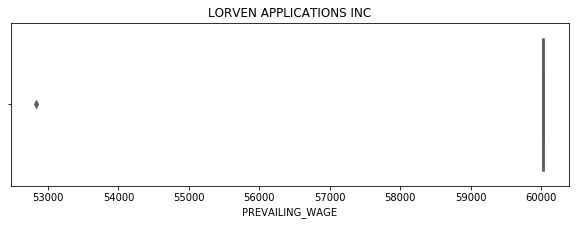

Median Salary: $60029.0


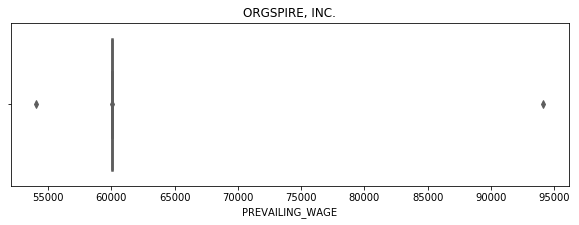

Median Salary: $118830.0


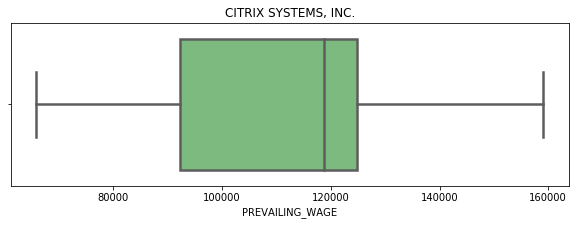

Median Salary: $89149.0


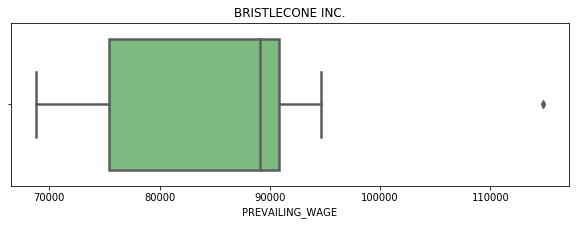

Median Salary: $93933.0


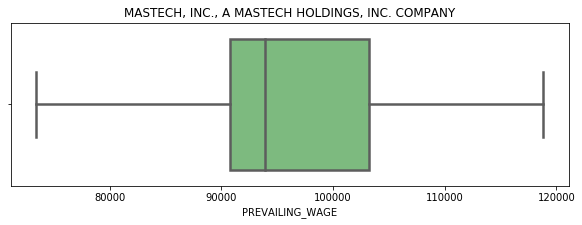

Median Salary: $54059.0


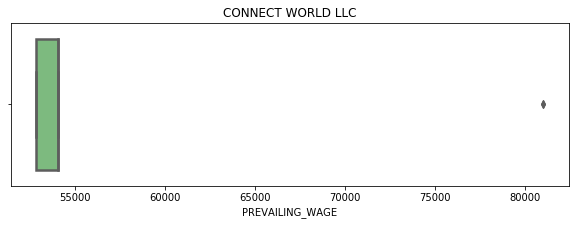

Median Salary: $60029.0


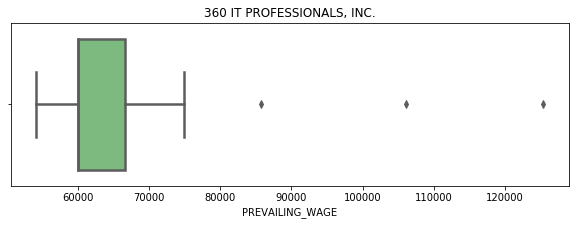

Median Salary: $68682.0


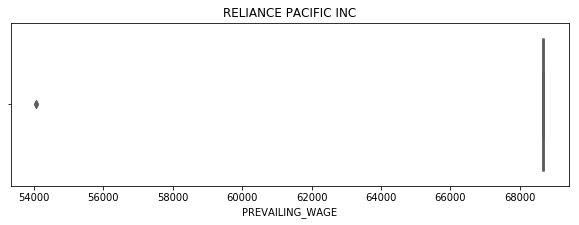

Median Salary: $108493.0


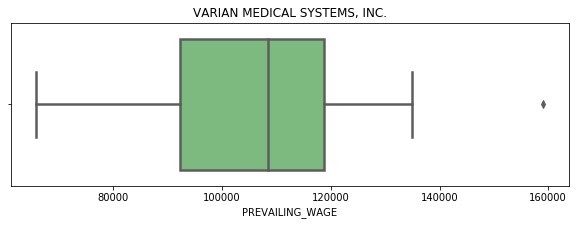

Median Salary: $54059.2


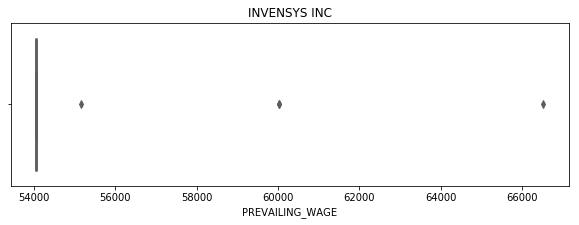

Median Salary: $82724.0


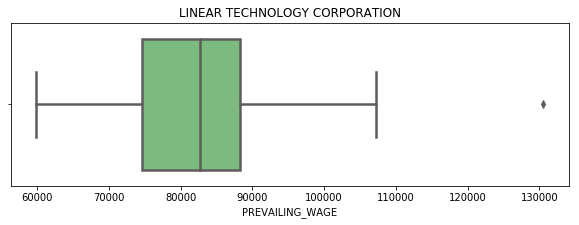

Median Salary: $69805.0


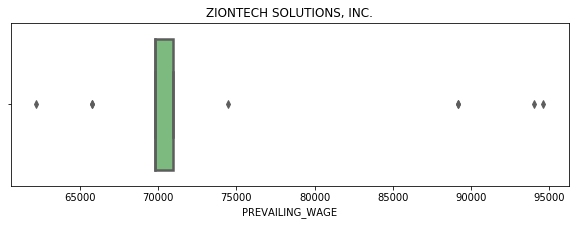

Median Salary: $73424.0


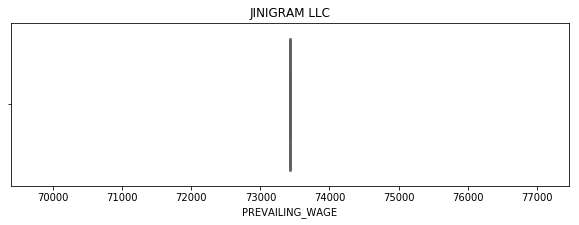

Median Salary: $103675.0


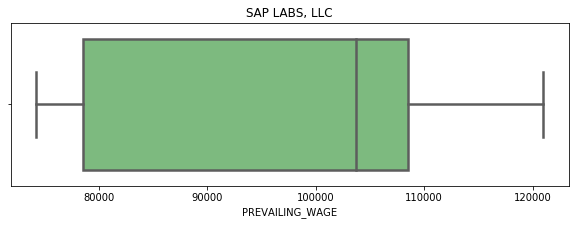

Median Salary: $69805.0


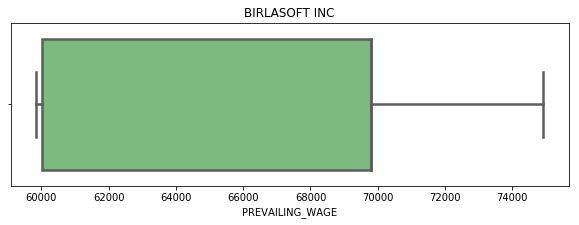

Median Salary: $52832.0


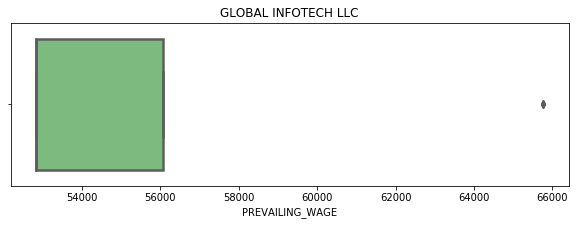

Median Salary: $47902.0


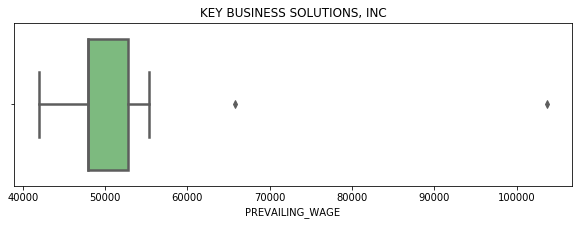

Median Salary: $89149.0


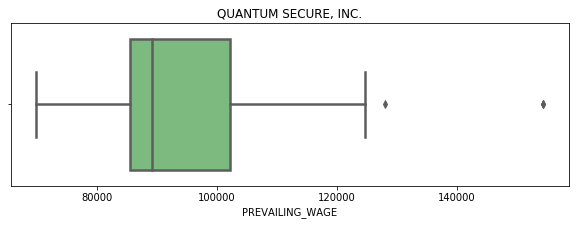

Median Salary: $80995.0


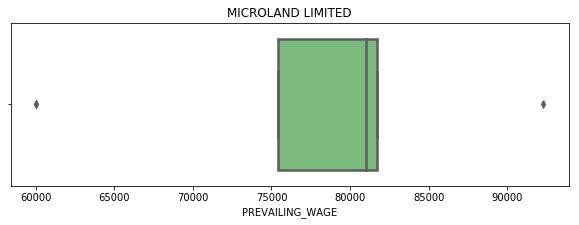

Median Salary: $60029.0


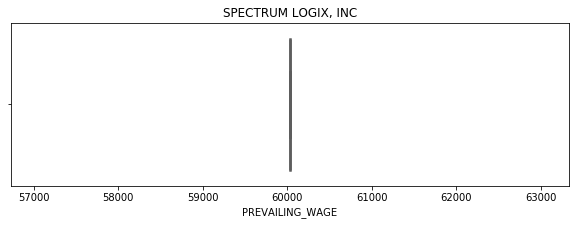

Median Salary: $71614.5


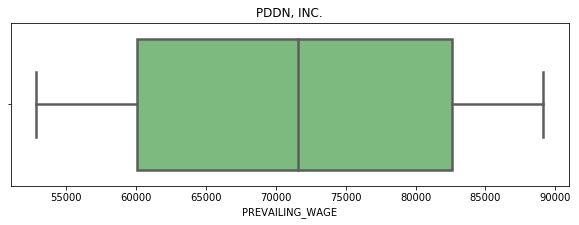

Median Salary: $79456.0


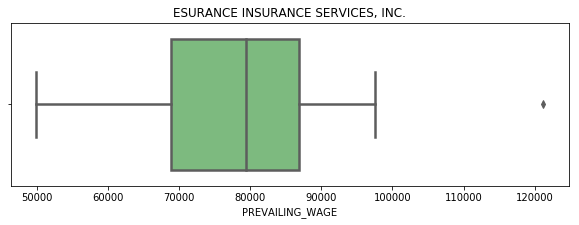

Median Salary: $73257.5


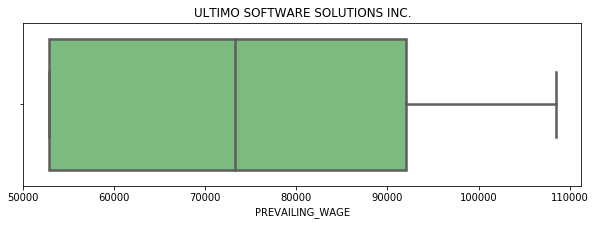

Median Salary: $105874.0


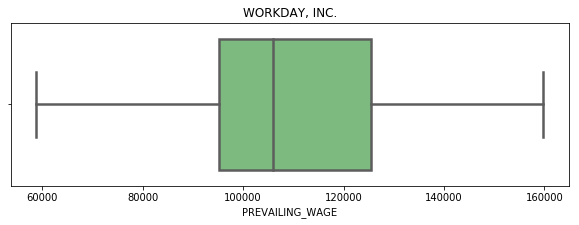

Median Salary: $60039.2


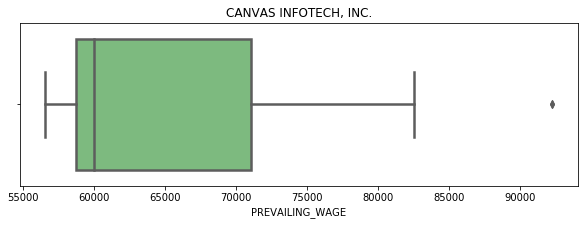

Median Salary: $74922.0


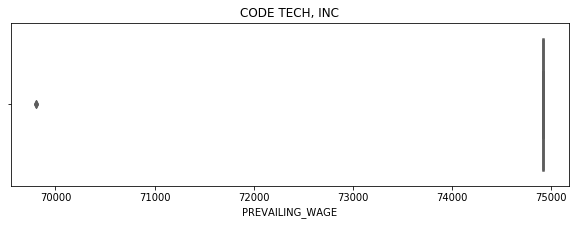

In [36]:
for company in list(between_20_and_49):
    all_counts = h1b_frame_cali.loc[h1b_frame_cali['EMPLOYER_NAME'] == company]
    median = all_counts['PREVAILING_WAGE'].median()
    print("Median Salary: $%s" % median)
    fig = plt.figure(figsize = (10, 3))
    ax = sns.boxplot(x='PREVAILING_WAGE', data=all_counts, linewidth=2.5, palette="Greens")
    ax.set_title(company)
    mean_salaries.append((company, median))
    plt.show()

Median Salary: $90355.0


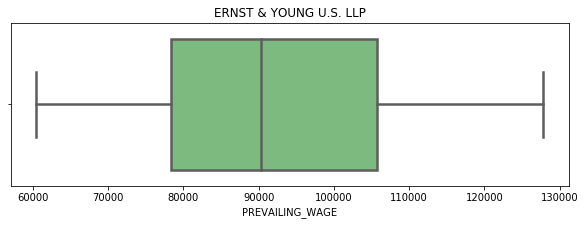

Median Salary: $67683.0


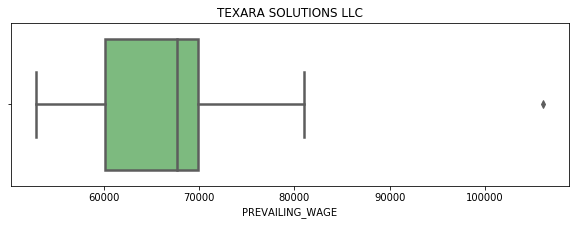

Median Salary: $128982.0


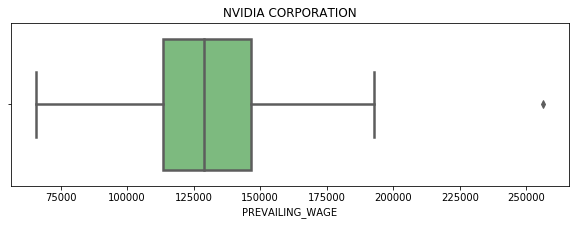

Median Salary: $125385.0


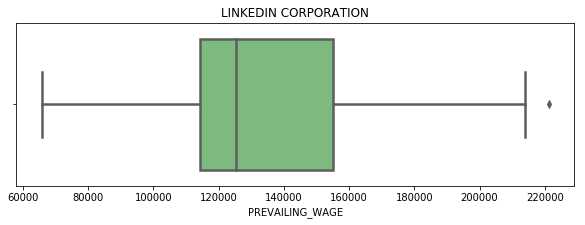

Median Salary: $47902.0


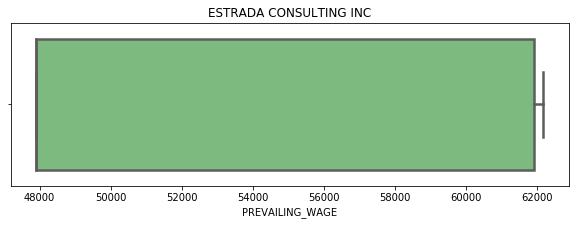

Median Salary: $108805.0


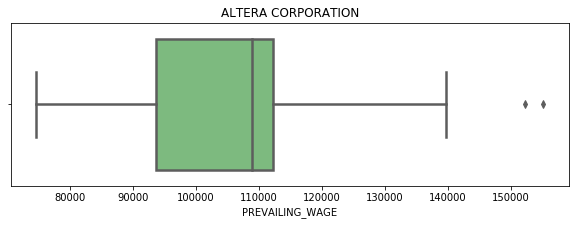

Median Salary: $92290.0


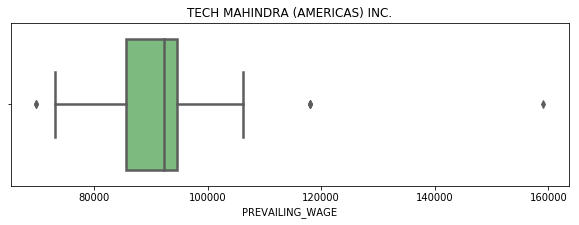

Median Salary: $108992.0


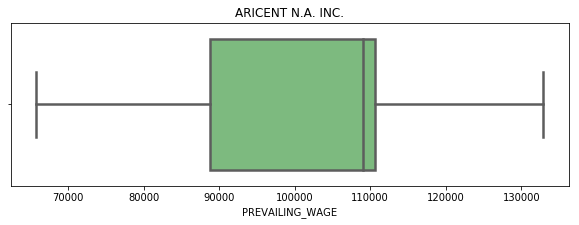

Median Salary: $89149.0


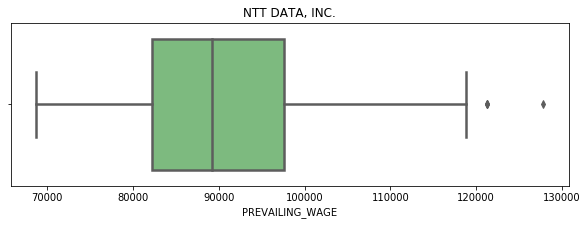

Median Salary: $94037.0


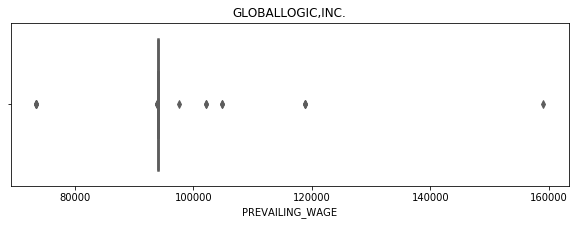

Median Salary: $114155.0


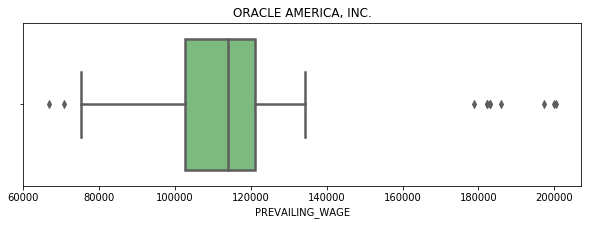

Median Salary: $102882.5


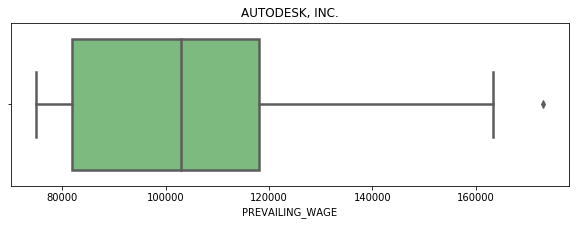

Median Salary: $108805.0


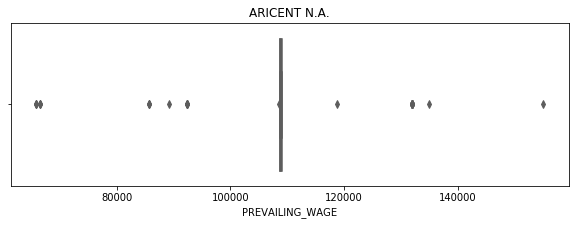

Median Salary: $66518.0


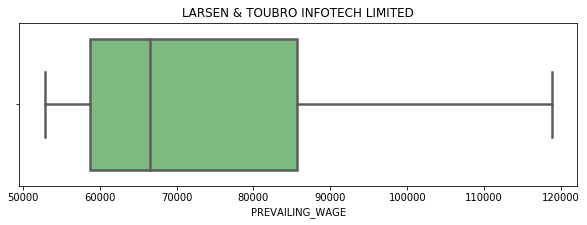

Median Salary: $97573.0


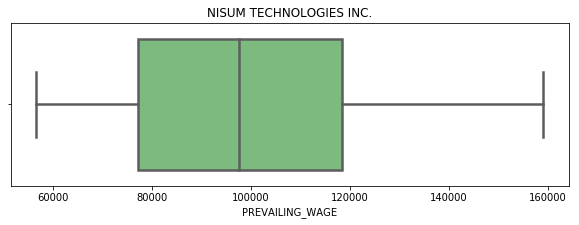

Median Salary: $69805.0


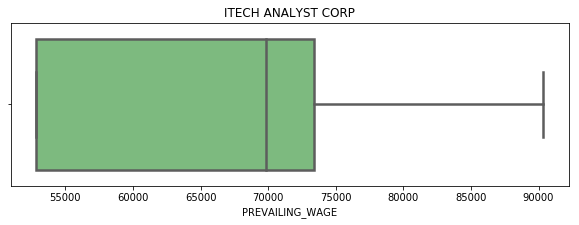

Median Salary: $73424.0


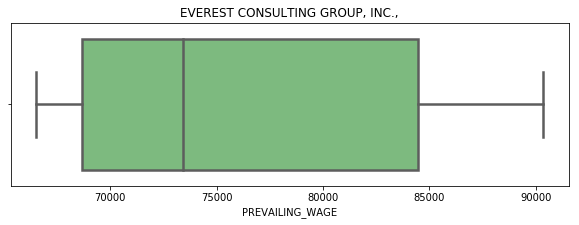

Median Salary: $54059.0


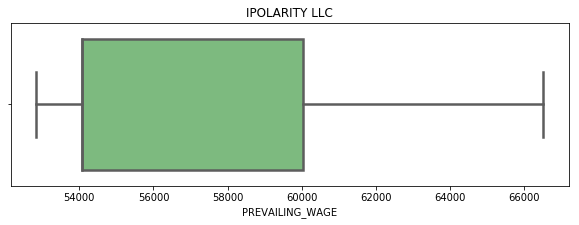

Median Salary: $69805.0


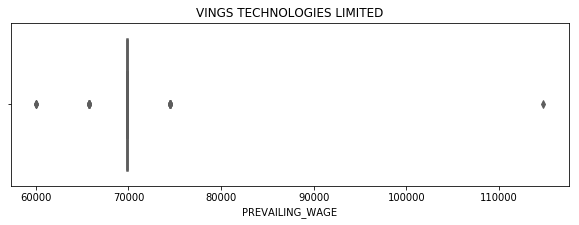

Median Salary: $108992.0


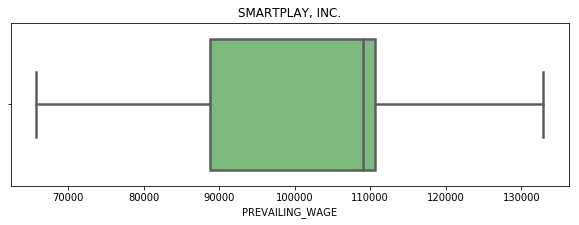

Median Salary: $74443.0


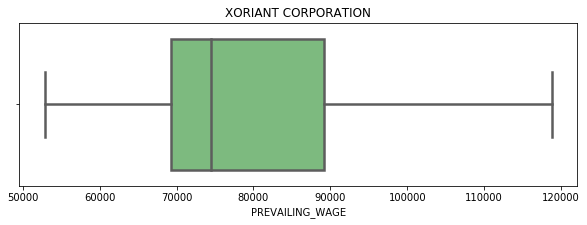

Median Salary: $121408.5


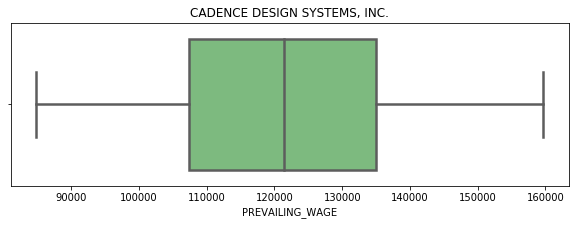

Median Salary: $89149.0


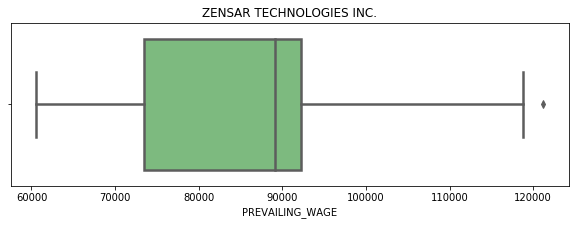

Median Salary: $90355.0


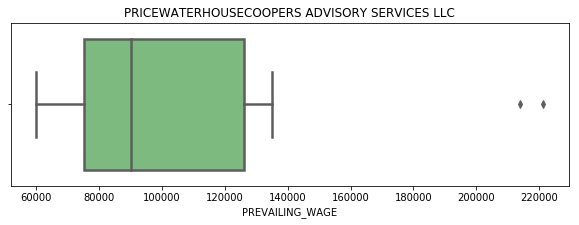

Median Salary: $65770.0


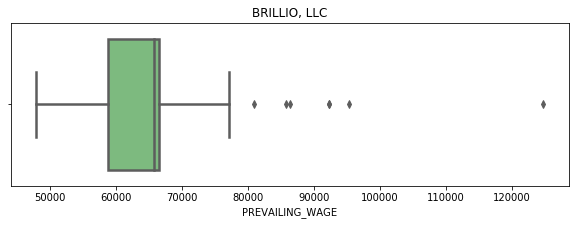

Median Salary: $121222.0


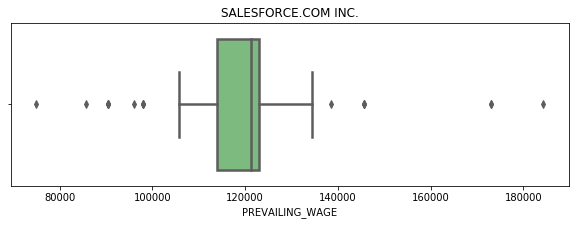

Median Salary: $118082.0


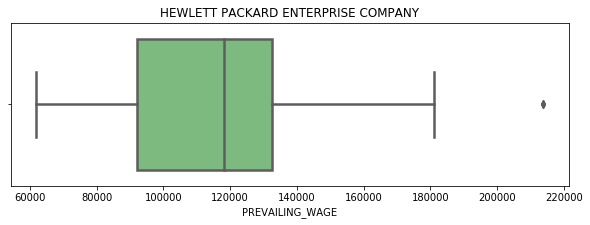

Median Salary: $113700.0


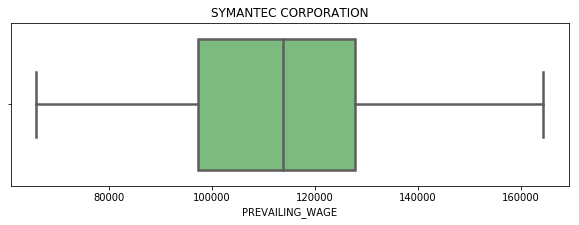

Median Salary: $112367.5


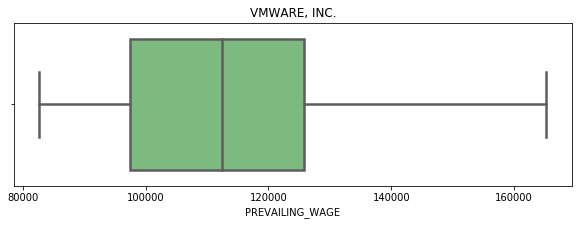

Median Salary: $92290.0


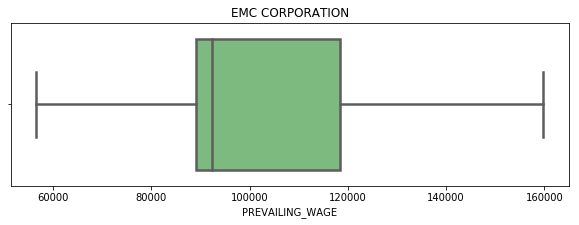

Median Salary: $118456.0


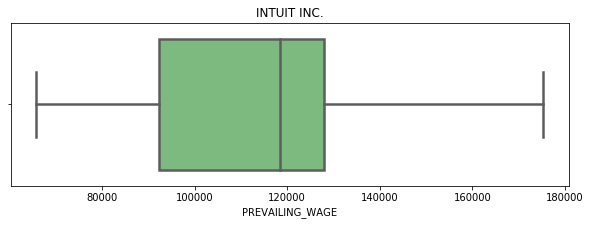

Median Salary: $95306.0


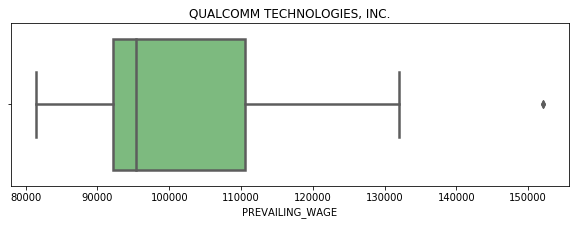

Median Salary: $119152.0


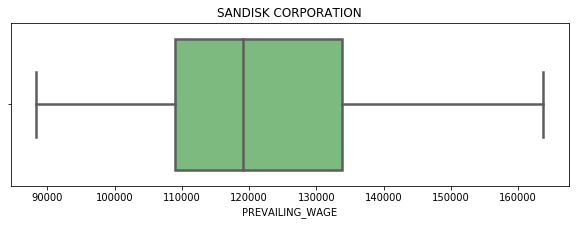

Median Salary: $70886.0


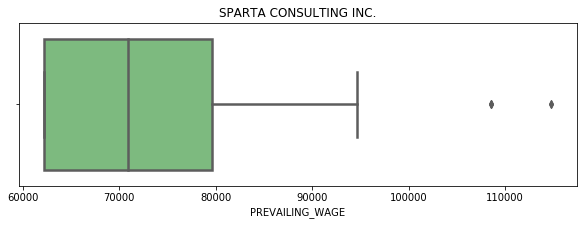

Median Salary: $77064.0


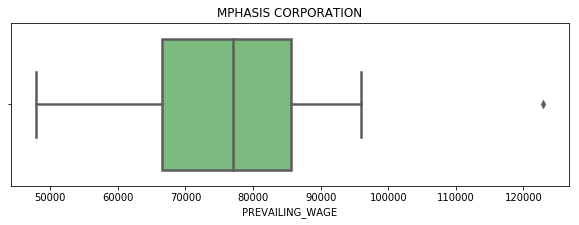

Median Salary: $69805.0


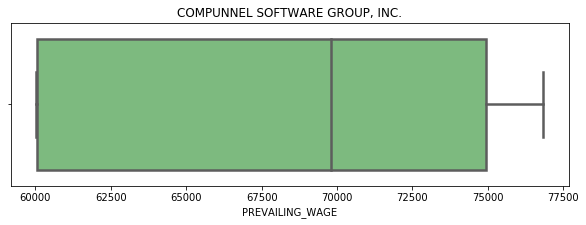

Median Salary: $108493.0


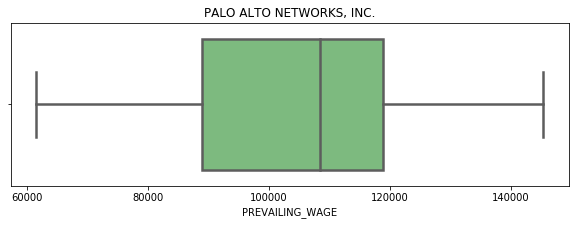

Median Salary: $69805.0


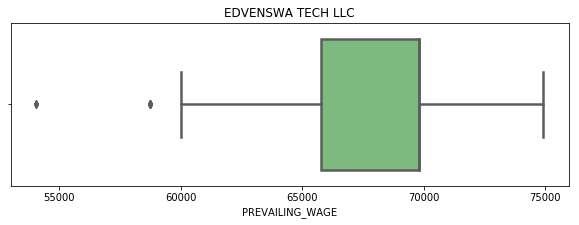

Median Salary: $92289.6


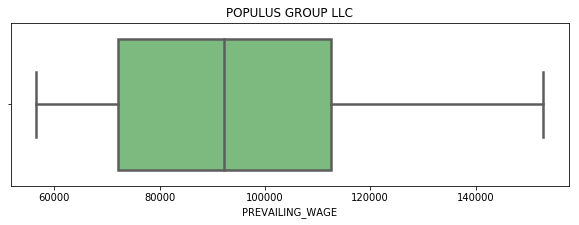

Median Salary: $73424.0


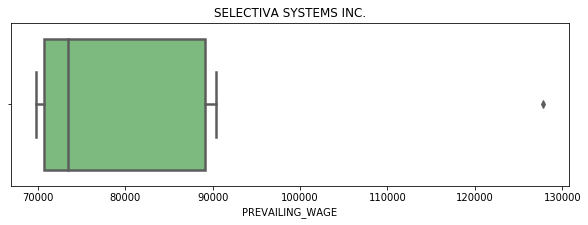

Median Salary: $110456.0


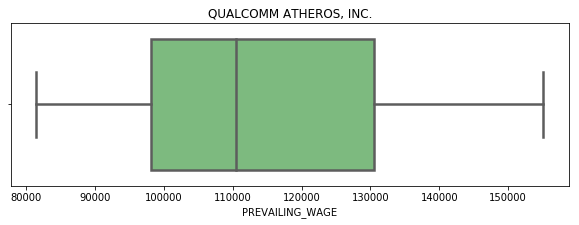

Median Salary: $87027.0


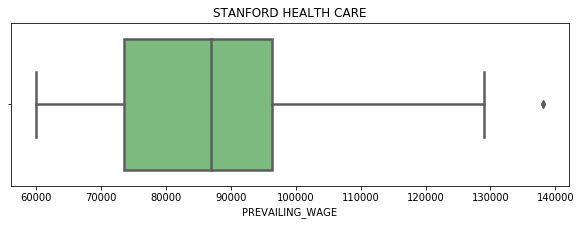

Median Salary: $108805.0


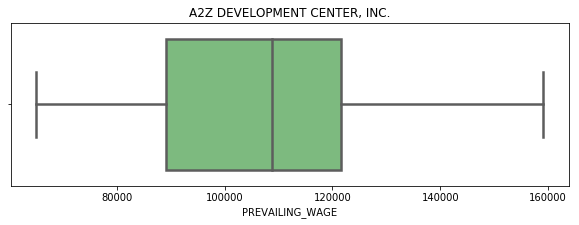

Median Salary: $127837.0


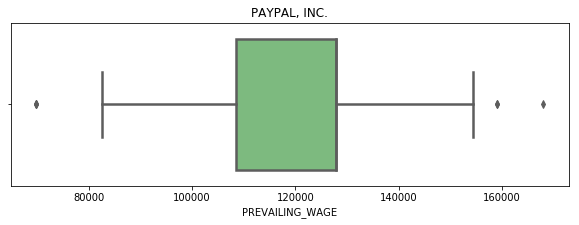

Median Salary: $118150.0


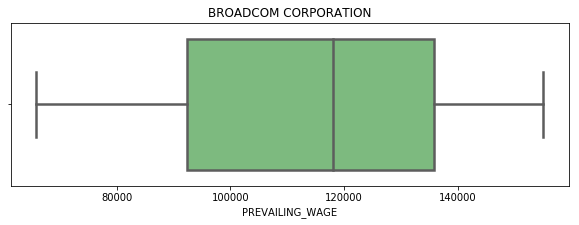

Median Salary: $73424.0


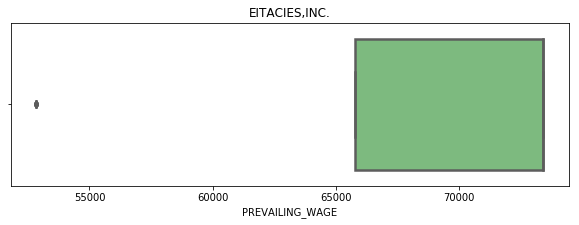

Median Salary: $98779.0


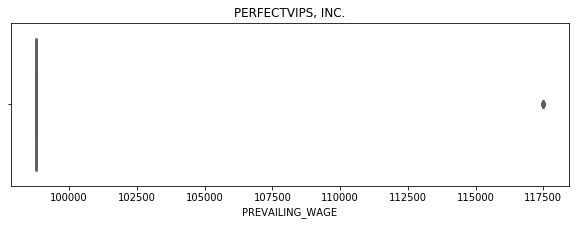

Median Salary: $111061.5


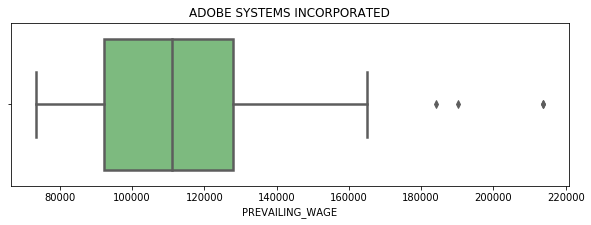

Median Salary: $66518.0


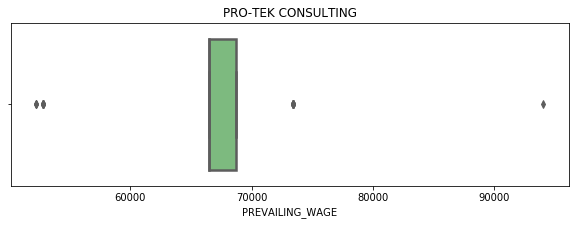

Median Salary: $60029.0


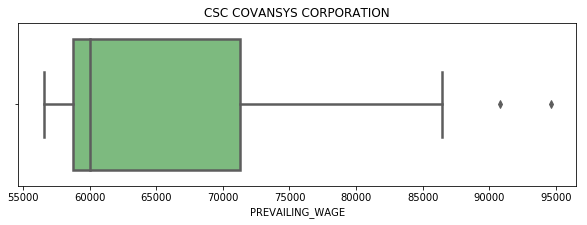

Median Salary: $58760.0


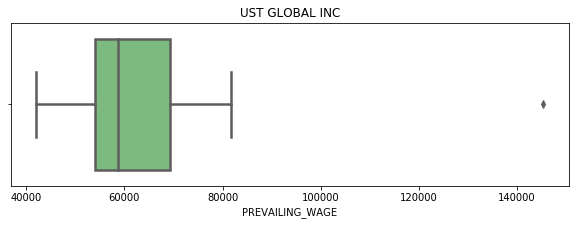

Median Salary: $58760.0


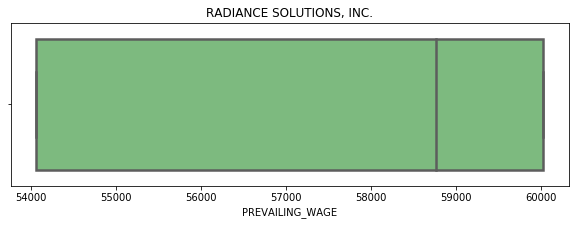

Median Salary: $60029.0


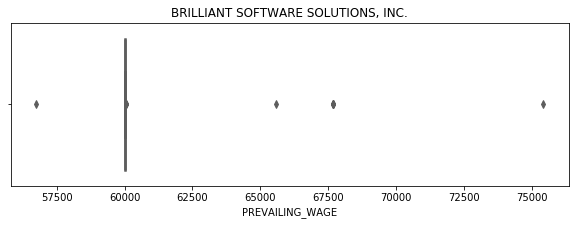

Median Salary: $118830.0


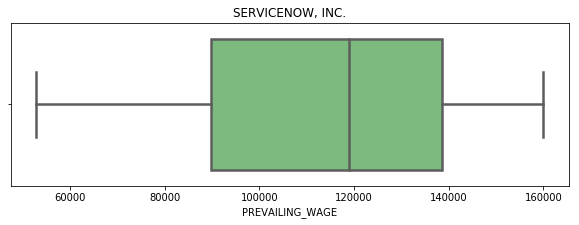

Median Salary: $69805.0


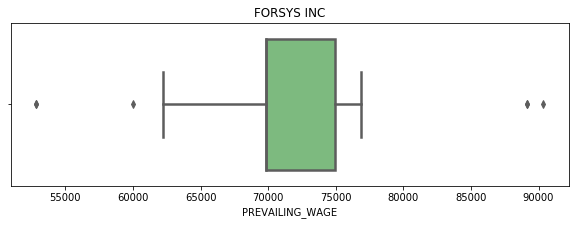

Median Salary: $47902.0


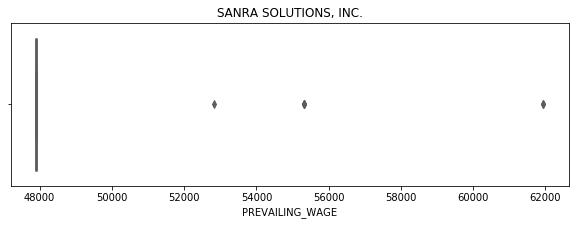

In [38]:
for company in list(between_99_and_50):
    all_counts = h1b_frame_cali.loc[h1b_frame_cali['EMPLOYER_NAME'] == company]
    median = all_counts['PREVAILING_WAGE'].median()
    print("Median Salary: $%s" % median)
    fig = plt.figure(figsize = (10, 3))
    ax = sns.boxplot(x='PREVAILING_WAGE', data=all_counts, linewidth=2.5, palette="Greens")
    ax.set_title(company)
    mean_salaries.append((company, median))
    plt.show()  

In [352]:
mean_salaries
mean_salaries = sorted(mean_salaries, key=lambda x: x[1])
mean_salaries

[('KEY BUSINESS SOLUTIONS, INC', 47902.0),
 ('ESTRADA CONSULTING INC', 47902.0),
 ('SANRA SOLUTIONS, INC.', 47902.0),
 ('ESTRADA CONSULTING INC', 47902.0),
 ('SANRA SOLUTIONS, INC.', 47902.0),
 ('KEY BUSINESS SOLUTIONS, INC', 47902.0),
 ('SIERRA INFOSYS, INC', 52832.0),
 ('ADEPTECH SYSTEMS INC', 52832.0),
 ('VALIANTICA INC', 52832.0),
 ('GLOBAL INFOTECH LLC', 52832.0),
 ('SIERRA INFOSYS, INC', 52832.0),
 ('ADEPTECH SYSTEMS INC', 52832.0),
 ('VALIANTICA INC', 52832.0),
 ('GLOBAL INFOTECH LLC', 52832.0),
 ('AB STAR GROUP', 54059.0),
 ('8K MILES HEALTH CLOUD INC', 54059.0),
 ('ZASPAR TECHNOLOGIES LLC', 54059.0),
 ('WORLDSCAPE, INC.', 54059.0),
 ('NMK GLOBAL INC.', 54059.0),
 ('EXCELA SOLUTIONS INC', 54059.0),
 ('SIGMAEDGE WORLDWIDE INC', 54059.0),
 ('PROFUSION SYSTEMS INC', 54059.0),
 ('NITYA SOFTWARE SOLUTIONS, INC', 54059.0),
 ('CONNECT WORLD LLC', 54059.0),
 ('IPOLARITY LLC', 54059.0),
 ('IPOLARITY LLC', 54059.0),
 ('AB STAR GROUP', 54059.0),
 ('8K MILES HEALTH CLOUD INC', 54059.0),
 (

In [353]:
X = h1b_frame_group.index.values
Y = h1b_frame_group['ratio to population'].values.flatten()
trace1 = go.Bar(
    x=X,
    y=Y,
    name='Ratios'
)

data = [trace1]
layout = go.Layout(
    title="Number of Applications per State in proportion to Population (2016)",
    barmode='stack'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped')

NameError: name 'h1b_frame_group' is not defined

In [354]:
companies = [i[0] for i in mean_salaries]
salaries = [i[1] for i in mean_salaries]

X = companies
Y = salaries
trace1 = go.Bar(
    x=X,
    y=Y,
)

data = [trace1]
layout = go.Layout(
    title="Median Salaries for Employeers that file most H1Bs in 2016 in SF Bay Area",
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='grouped')

In [12]:
h1b_frame_group = h1b_frame_with_states.loc[ h1b_frame_with_states['CASE_STATUS'] == 'CERTIFIED']
h1b_frame_group = h1b_frame_group.loc[ h1b_frame_group['state'] != 'Na']
h1b_frame_group_exempt1 = h1b_frame_group.loc[ h1b_frame_group['EMPLOYER_NAME'].str.contains('|'.join(cap_exampt_employee_list), case=False, na=False, regex=True) ]

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning:

This pattern has match groups. To actually get the groups, use str.extract.



In [15]:
h1b_frame_group_exempt1.groupby('EMPLOYER_NAME').count().sort_values('Unnamed: 0', ascending=False)

,Unnamed: 0,Unnamed: 0.1,CASE_STATUS,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat,state
EMPLOYER_NAME,,,,,,,,,,,,
YAHOO! INC.,2487,2487,2487,2487,2487,2487,2487,2487,2487,2486,2486,2487
UNIVERSITY OF MICHIGAN,2189,2189,2189,2046,2189,2189,2189,2189,2189,2188,2188,2189
MAYO CLINIC,1671,1671,1671,1669,1671,1671,1671,1671,1671,1586,1586,1671
"NATIONAL INSTITUTES OF HEALTH, HHS",1569,1569,1569,1569,1569,1569,1569,1569,1569,1540,1540,1569
TRUSTEES OF THE UNIVERSITY OF PENNSYLVANIA,1489,1489,1489,1489,1489,1489,1489,1489,1489,1483,1483,1489
YALE UNIVERSITY,1468,1468,1468,1468,1468,1468,1468,1468,1468,1460,1460,1468
JOHNS HOPKINS UNIVERSITY,1461,1461,1461,1461,1461,1461,1461,1461,1461,1455,1455,1461
COLUMBIA UNIVERSITY,1352,1352,1352,1352,1352,1352,1352,1352,1352,1343,1343,1352
UNIVERSITY OF PITTSBURGH,1324,1324,1324,1324,1324,1324,1324,1324,1324,1315,1315,1324


In [ ]:
all_counts = h1b_frame_cali.loc[h1b_frame_cali['EMPLOYER_NAME'] == 'WIPRO LIMITED']
jobs = ['software']
all_counts[all_counts['JOB_TITLE'].str.contains('|'.join(jobs), case=False, na=False)].groupby('JOB_TITLE', as_index=False)['PREVAILING_WAGE']
    all_counts = all_counts[all_counts['SOC_NAME'].str.contains('|'.join(jobs), case=False, na=False)]


In [24]:
h1b_frame_cali.groupby('EMPLOYER_NAME').count().sum()

Unnamed: 0            31140
Unnamed: 0.1          31140
CASE_STATUS           31140
SOC_NAME              31140
JOB_TITLE             31140
FULL_TIME_POSITION    31140
PREVAILING_WAGE       31140
YEAR                  31140
WORKSITE              31140
lon                   31140
lat                   31140
state                 31140
dtype: int64